<a href="https://colab.research.google.com/github/Adarshthakur-850/Amaze.github.io/blob/main/k_mean_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

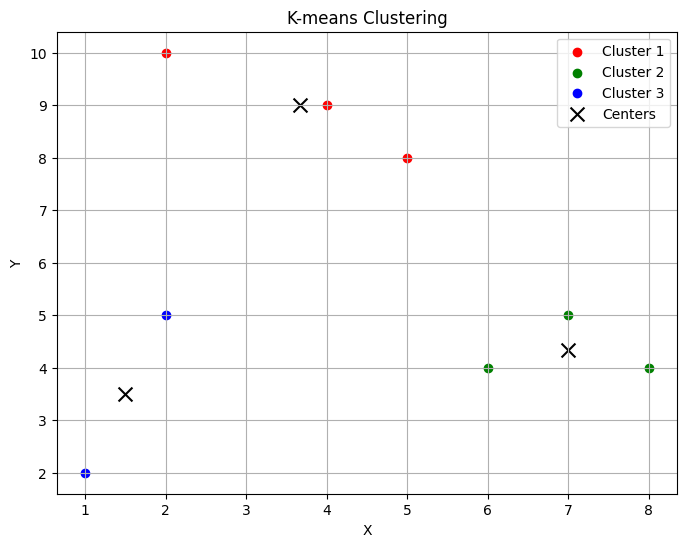

In [ ]:
#without using KMeans library
import numpy as np
import matplotlib.pyplot as plt

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Function to calculate the distance between points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Function to assign points to the nearest cluster center
def assign_clusters(points, centers):
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update the cluster centers
def update_centers(points, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = points[np.array(clusters) == i]
        if len(cluster_points) > 0:
            new_center = cluster_points.mean(axis=0)
        else:
            new_center = initial_centers[i]
        new_centers.append(new_center)
    return np.array(new_centers)

# Function to check if centers have converged
def has_converged(old_centers, new_centers):
    return np.array_equal(old_centers, new_centers)

# Number of clusters
k = 3

# K-means clustering algorithm
def kmeans(points, initial_centers, k):
    centers = initial_centers
    clusters = assign_clusters(points, centers)
    converged = False
    while not converged:
        new_centers = update_centers(points, clusters, k)
        converged = has_converged(centers, new_centers)
        centers = new_centers
        clusters = assign_clusters(points, centers)
    return centers, clusters

# Running K-means clustering
final_centers, final_clusters = kmeans(points, initial_centers, k)

# Plotting the results
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = points[np.array(final_clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

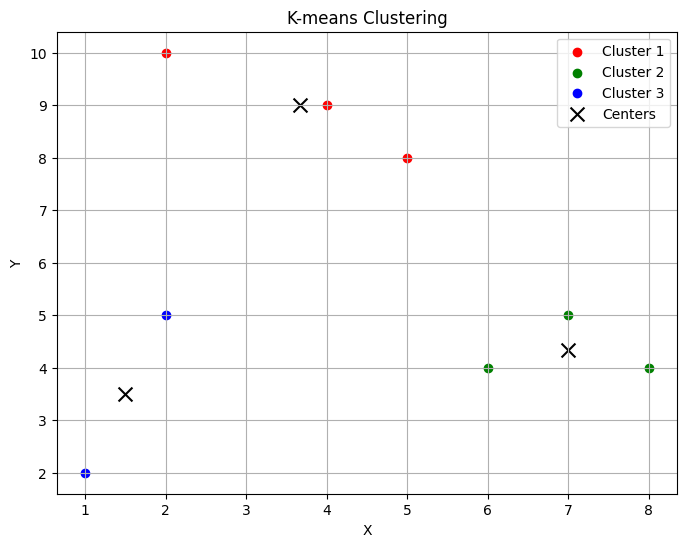

In [ ]:
#using KMeans library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial cluster centers
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Number of clusters
k = 3

# KMeans clustering using sklearn
kmeans = KMeans(n_clusters=k, init=initial_centers, n_init=1)
kmeans.fit(points)

# Cluster centers and labels
final_centers = kmeans.cluster_centers_
final_clusters = kmeans.labels_

# Plotting the results
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = points[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


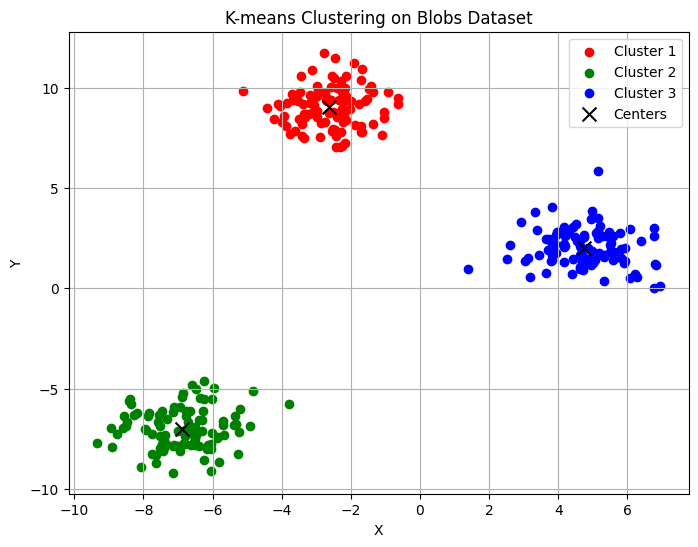

In [ ]:
#KMeans clustering using make_blobs dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

points, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# KMeans clustering using sklearn
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(points)

# Cluster centers and labels
final_centers = kmeans.cluster_centers_
final_clusters = kmeans.labels_

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(n_clusters):
    cluster_points = points[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='black', marker='x', s=100, label='Centers')
plt.title('K-means Clustering on Blobs Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


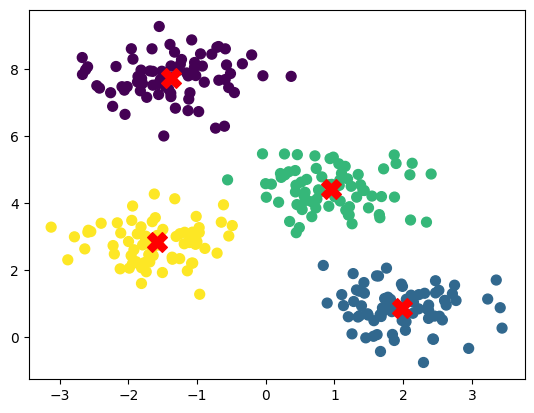

In [ ]:
#KMeans++ using make_blobs and without using library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def kmeans_plus_plus(X, k):
    n_samples, _ = X.shape
    # Initialize centroids list and randomly select the first centroid
    centroids = [X[np.random.choice(range(n_samples))]]
    for _ in range(1, k):
        # Compute distances from each point to the nearest centroid
        dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])

        # Compute the probability of selecting each point as the next centroid
        prob = dist_sq / dist_sq.sum()

        # Select the next centroid based on the computed probabilities
        next_centroid = X[np.random.choice(range(n_samples), p=prob)]
        centroids.append(next_centroid)

    return np.array(centroids)

def kmeans(X, k, max_iters=300, tol=1e-4):#tol represents tolerance
    # Initialize centroids using KMeans++
    centroids = kmeans_plus_plus(X, k)
    for i in range(max_iters):
        # Assign clusters based on closest centroid
        clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids,
                                            axis=2), axis=1)
        # Compute new centroids from the clusters
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return centroids, clusters

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Number of clusters
k = 4
# Run KMeans algorithm
centroids, clusters = kmeans(X, k)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.show()

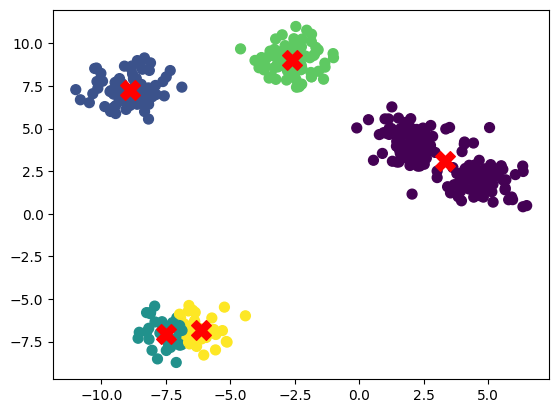

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def kmeans_plus_plus(X, k):
    n_samples, _ = X.shape
    centroids = [X[np.random.choice(range(n_samples))]]
    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
        prob = dist_sq / dist_sq.sum()
        next_centroid = X[np.random.choice(range(n_samples), p=prob)]
        centroids.append(next_centroid)
    return np.array(centroids)

def kmeans(X, k, max_iters=300, tol=1e-4):
    centroids = kmeans_plus_plus(X, k)
    for i in range(max_iters):
        clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids,
                                            axis=2), axis=1)
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return centroids, clusters

# Change the input parameters for make_blobs
X, y = make_blobs(n_samples=400, centers=5, cluster_std=0.80, random_state=42)

# Number of clusters
k = 5
# Run KMeans algorithm
centroids, clusters = kmeans(X, k)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.show()


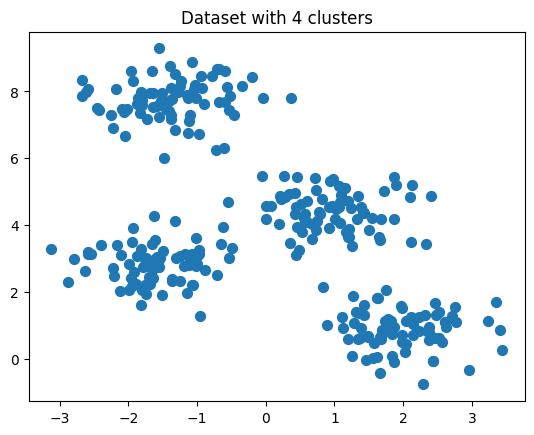

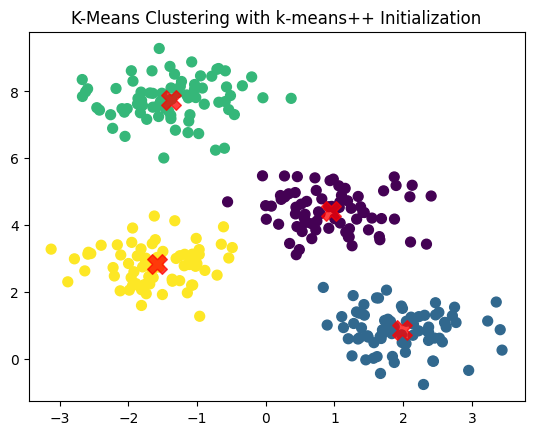

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a dataset using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dataset with 4 clusters")
plt.show()

# Initialize and fit KMeans using k-means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X)

# Predict the cluster labels
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering with k-means++ Initialization")
plt.show()


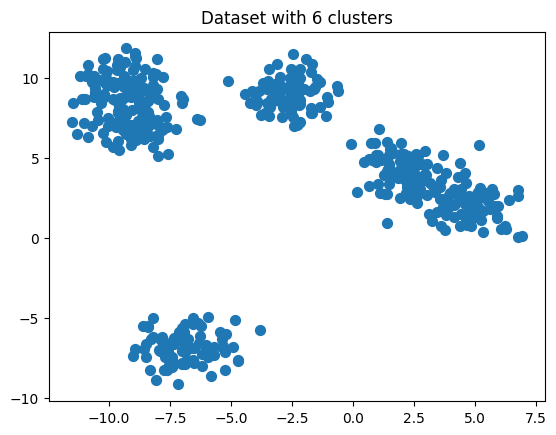

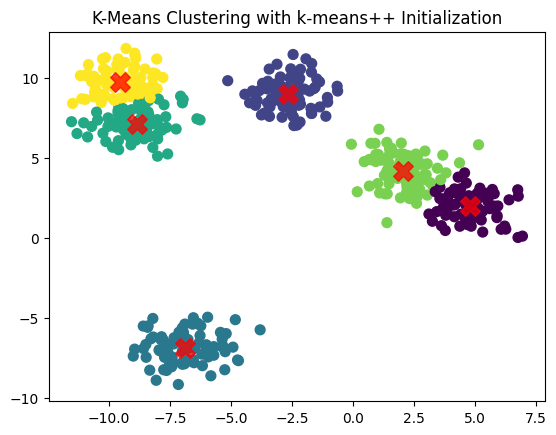

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a dataset using make_blobs with changed parameters
X, y = make_blobs(n_samples=500, centers=6, cluster_std=1.0, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dataset with 6 clusters")
plt.show()

# Initialize and fit KMeans using k-means++ initialization
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

# Predict the cluster labels
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering with k-means++ Initialization")
plt.show()


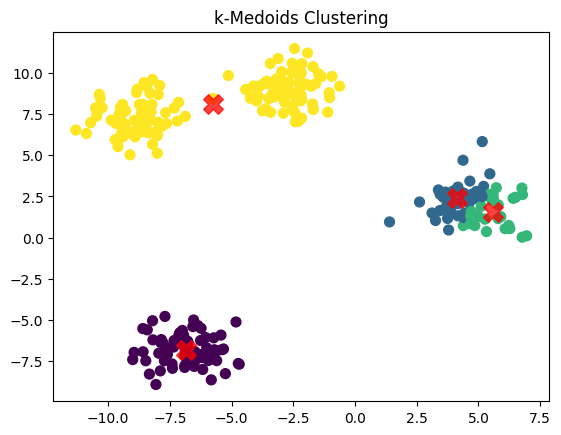

In [ ]:
#without using inbuilt library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import random

def k_medoids(X, k, max_iter=100):
    # Step 1: Initialize medoids randomly
    m = X.shape[0]
    medoids = np.array(random.sample(list(X), k))

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        labels = pairwise_distances_argmin(X, medoids)

        # Step 3: Calculate new medoids
        new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # If medoids didn't change, then we've converged
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Generating synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying k-Medoids algorithm
k = 4
medoids, labels = k_medoids(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering')
plt.show()


In [ ]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00


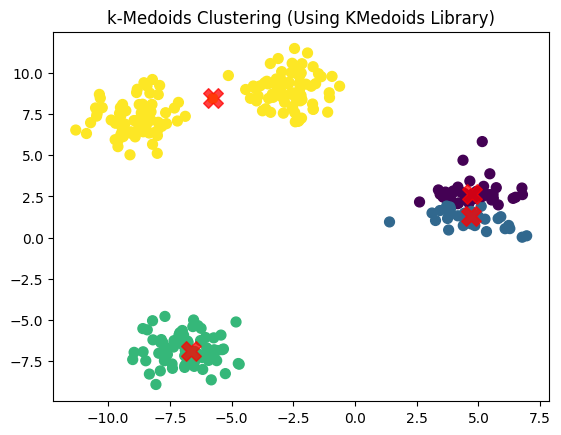

In [ ]:
#using KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply k-Medoids algorithm
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X)

# Get the medoids and labels
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering (Using KMedoids Library)')
plt.show()


In [ ]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": []
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "code",
      "execution_count": None,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 839
        },
        "id": "c6Zs9kFrJGjR",
        "outputId": "3b6ad90d-f55c-4a2b-cfb2-cc464011d280"
      },
      "outputs": [
        {
          "output_type": "stream",
          "name": "stderr",
          "text": [
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n",
            "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
            "  super()._check_params_vs_input(X, default_n_init=10)\n"
          ]
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ]
            ,
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAk0AAAHHCAYAAACiOWx7AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABjP0lEQVR4nO3deVwU9f8H8NcCsiByeQCiCB55I96It0mgX7TIvC3vqzBFy9TKNPsmHj9LK9Osb2Lmbeq31CREwAsVUfCEFBEtAU9YRUWOz++P+e7kCuhyzi68no/HPJid+czsexZqX8585jMqIYQAERERET2XidIFEBERERkDhiYiIiIiPTA0EREREemBoYmIiIhIDwxNRERERHpgaCIiIiLSA0MTERERkR4YmoiIiIj0wNBEREREpAeGJiIDolKpMH/+fPn1/PnzoVKpcPv2beWKMlBubm7o169fmb9PREQEVCoVIiIiXtg2OjoanTt3hpWVFVQqFWJjY8u8vvJWlM9DqffmfzdUVhiaiMpYcHAwVCpVodOxY8eULrHY3NzcoFKp4O3tXeD677//Xj7OkydPFnn/Fy5cwPz583H16tUSVlr2srOzMWjQINy9exdffvkl1q9fD1dX1zJ/32vXrmHy5Mlwc3ODWq2Gg4MD/P39ceTIkRLt99tvv0VwcHDpFElUQZgpXQBRZbFgwQLUr18/3/JGjRopUE3psbCwQHh4OFJTU+Hk5KSzbsOGDbCwsMDjx4+Lte8LFy7g008/Rc+ePeHm5lYK1ZadxMREJCcn4/vvv8f48ePL5T2PHDmCf/3rXwCA8ePHo3nz5khNTUVwcDC6deuGFStW4N133y3Wvr/99lvUrFkTo0eP1lnevXt3PHr0CObm5iUtn8joMDQRlZO+ffuiffv2SpdR6rp06YLo6Ghs2bIF06ZNk5f/9ddfOHToEF5//XX88ssvClZYPm7evAkAsLOzK7V9ZmZmwsrKqsB19+7dw8CBA2FpaYkjR46gYcOG8roZM2bA19cXgYGBaNeuHTp37lxqNZmYmMDCwqLU9kdkTHh5jsgI3L59G4MHD4aNjQ1q1KiBadOm5Tt7k5OTg88++wwNGzaEWq2Gm5sbPvzwQ2RlZcltZsyYgRo1akAIIS979913oVKp8NVXX8nL0tLSoFKpsGrVqhfWZmFhgQEDBmDjxo06yzdt2gR7e3v4+voWuF18fDwGDhyI6tWrw8LCAu3bt8evv/4qrw8ODsagQYMAAL169ZIv8z3bn+Xw4cPo2LEjLCws0KBBA/z000/53uvKlSsYNGgQqlevjqpVq6JTp07Ys2dPvnZ//fUX/P39YWVlBQcHB0yfPl3n8yvM6NGj0aNHDwDAoEGDoFKp0LNnT3n9gQMH0K1bN1hZWcHOzg6vvfYaLl68qLMPbT+cCxcuYPjw4bC3t0fXrl0Lfc/vvvsOqampWLp0qU5gAgBLS0usW7cOKpUKCxYskJdrLxUfPHgQkyZNQo0aNWBjY4ORI0fi3r17cjs3NzecP38ekZGR8ueuPZ6C+hX17NkTLVu2xJkzZ9CjRw9UrVoVjRo1wvbt2wEAkZGR8PT0hKWlJZo0aYL9+/fr1JucnIx33nkHTZo0gaWlJWrUqIFBgwaV6mXZ5ORkNGrUCC1btkRaWlqp7ZcqF4YmonKSkZGB27dv60x37tzRa9vBgwfj8ePHCAoKwr/+9S989dVXmDhxok6b8ePH45NPPkHbtm3x5ZdfokePHggKCsLQoUPlNt26dcPdu3dx/vx5edmhQ4dgYmKCQ4cO6SwDpEsx+hg+fDhOnDiBxMREednGjRsxcOBAVKlSJV/78+fPo1OnTrh48SJmz56NZcuWwcrKCv7+/ti5c6f83lOnTgUAfPjhh1i/fj3Wr1+PZs2ayfu5fPkyBg4ciFdeeQXLli2Dvb09Ro8erXN8aWlp6Ny5M0JCQvDOO+/g888/x+PHj/Hqq6/K7wUAjx49Qu/evRESEoIpU6bgo48+wqFDh/DBBx+88PgnTZqEDz/8EAAwdepUrF+/Hh999BEAYP/+/fD19cXNmzcxf/58zJgxA0ePHkWXLl0KDAWDBg3Cw4cPsXDhQkyYMKHQ9/ztt99gYWGBwYMHF7i+fv366Nq1Kw4cOIBHjx7prJsyZQouXryI+fPnY+TIkdiwYQP8/f3lML18+XLUrVsXTZs2lT937fEU5t69e+jXrx88PT2xZMkSqNVqDB06FFu2bMHQoUPxr3/9C4sWLUJmZiYGDhyI+/fvy9tGR0fj6NGjGDp0KL766itMnjwZYWFh6NmzJx4+fPjc99VHYmIiunfvDmtra0RERMDR0bHE+6RKShBRmVq7dq0AUOCkVqt12gIQ8+bNk1/PmzdPABCvvvqqTrt33nlHABBxcXFCCCFiY2MFADF+/Hiddu+//74AIA4cOCCEEOLmzZsCgPj222+FEEKkp6cLExMTMWjQIOHo6ChvN3XqVFG9enWRl5f33GNzdXUVfn5+IicnRzg5OYnPPvtMCCHEhQsXBAARGRkpH390dLS8Xe/evYW7u7t4/PixvCwvL0907txZvPTSS/Kybdu2CQAiPDy8wPcGIA4ePCgvu3nzplCr1eK9996TlwUGBgoA4tChQ/Ky+/fvi/r16ws3NzeRm5srhBBi+fLlAoDYunWr3C4zM1M0atSo0BqeFh4eLgCIbdu26Sxv3bq1cHBwEHfu3JGXxcXFCRMTEzFy5Eh5mfZ3PWzYsOe+j5adnZ3w8PB4bpupU6cKAOLMmTNCiH/+Ftu1ayeePHkit1uyZIkAIP773//Ky1q0aCF69OhR6HE+/Xn06NFDABAbN26Ul8XHxwsAwsTERBw7dkxeHhISIgCItWvXyssePnyY732ioqIEAPHTTz89970Lov0sb926JS5evCicnZ1Fhw4dxN27d5+7HdGL8EwTUTlZuXIlQkNDdabff/9dr20DAgJ0Xms79+7du1fn54wZM3TavffeewAgX4qqVasWmjZtioMHDwKQOhKbmppi5syZSEtLw6VLlwBIZ5q6du0KlUqlV32mpqYYPHgwNm3aBEDqAO7i4oJu3brla3v37l0cOHAAgwcPxv3793XOuvn6+uLSpUv4+++/9Xrf5s2b67xHrVq10KRJE1y5ckVetnfvXnTs2FHnUle1atUwceJEXL16FRcuXJDb1a5dGwMHDpTbVa1aNd8ZvaJISUlBbGwsRo8ejerVq8vLW7VqhVdeeUX+vT1t8uTJeu37/v37sLa2fm4b7XqNRqOzfOLEiTpnAN9++22YmZkVWI++qlWrpnNWs0mTJrCzs0OzZs3g6ekpL9fOP/07srS0lOezs7Nx584dNGrUCHZ2djh16lSxazp37hx69OgBNzc37N+/H/b29sXeFxHAjuBE5aZjx47F7gj+0ksv6bxu2LAhTExM5Ms7ycnJMDExyXcnnpOTE+zs7JCcnCwv69atm/zleOjQIbRv3x7t27dH9erVcejQITg6OiIuLg7Dhw8vUo3Dhw/HV199hbi4OGzcuBFDhw4tMHRdvnwZQgjMnTsXc+fOLXBfN2/eRJ06dV74nvXq1cu3zN7eXqd/TnJyss6Xtpb2Ml9ycjJatmwp93l5tuYmTZq8sI7CaD/3gvbRrFkzhISE5OvsXdAdlgWxtrbWucRVEO36Z8PVs39P1apVQ+3atUvUh6hu3br5PjtbW1u4uLjkWwZA53f06NEjBAUFYe3atfj77791+txlZGQUu6b+/fvD0dERISEhqFatWrH3Q6TF0ERkhAo7A6TPmaGuXbvi+++/x5UrV3Do0CF069YNKpUKXbt2xaFDh+Ds7Iy8vLwCzxI9j6enJxo2bIjAwEAkJSUVGrry8vIAAO+//36hncT1HYbB1NS0wOVPf+kam6fPujxPs2bNcPr0aWRlZUGtVhfY5syZM6hSpUq+kFQWCvtd6PM7evfdd7F27VoEBgbCy8sLtra2UKlUGDp0qPz3UhxvvPEG1q1bhw0bNmDSpEnF3g+RFkMTkRG4dOmSzhmIy5cvIy8vTx67yNXVFXl5ebh06ZJOR+m0tDSkp6frDLKoDUOhoaGIjo7G7NmzAUgdr1etWgVnZ2dYWVmhXbt2Ra5z2LBh+Pe//41mzZqhdevWBbZp0KABAKBKlSqFDoqppe/lwedxdXVFQkJCvuXx8fHyeu3Pc+fOQQih874FbVuU9y5sH/Hx8ahZs2ahQwq8SL9+/RAVFYVt27bhzTffzLf+6tWrOHToELy9vfMFsUuXLqFXr17y6wcPHiAlJUUe8wkonc9eX9u3b8eoUaOwbNkyednjx4+Rnp5eov0uXboUZmZmeOedd2BtbV3ks6dEz2KfJiIjsHLlSp3XX3/9NQBp7CcA8pfd8uXLddp98cUXAAA/Pz95Wf369VGnTh18+eWXyM7ORpcuXQBIYSoxMRHbt29Hp06dYGZW9H9TjR8/HvPmzdP58nuWg4MDevbsie+++w4pKSn51t+6dUue1waKknx5/utf/8KJEycQFRUlL8vMzMSaNWvg5uaG5s2by+1u3Lgh3yYPAA8fPsSaNWuK/d61a9dG69atsW7dOp1jOHfuHP744w+dkFJUkyZNgoODA2bOnKnTPwiQAseYMWMghMAnn3ySb9s1a9YgOztbfr1q1Srk5OTIf0+A9NmXNLToy9TUNN/Zwa+//hq5ubkl2q9KpcKaNWswcOBAjBo1SmdIC6Li4JkmonLy+++/y2c3nta5c2f57EthkpKS8Oqrr6JPnz6IiorCzz//jOHDh8PDwwMA4OHhgVGjRmHNmjVIT09Hjx49cOLECaxbtw7+/v46ZxUAKSBt3rwZ7u7ucufYtm3bwsrKCn/++Wex/0Xu6uqq8+y8wqxcuRJdu3aFu7s7JkyYgAYNGiAtLQ1RUVH466+/EBcXBwBo3bo1TE1NsXjxYmRkZECtVuPll1+Gg4OD3jXNnj0bmzZtQt++fTF16lRUr14d69atQ1JSEn755ReYmEj/dpwwYQK++eYbjBw5EjExMahduzbWr1+PqlWrFuuz0Fq6dCn69u0LLy8vjBs3Do8ePcLXX38NW1tbvT6rwtSoUQPbt2+Hn58f2rZtm29E8MuXL2PFihUFDmz55MkT9O7dG4MHD0ZCQgK+/fZbdO3aFa+++qrcpl27dli1ahX+/e9/o1GjRnBwcMDLL79c7Hqfp1+/fli/fj1sbW3RvHlzREVFYf/+/ahRo0aJ921iYoKff/4Z/v7+GDx4MPbu3Vtmx0GVgIJ37hFVCs8bcgDP3HqNQoYcuHDhghg4cKCwtrYW9vb2YsqUKeLRo0c675OdnS0+/fRTUb9+fVGlShXh4uIi5syZo3Nbv9bKlSsFAPH222/rLPf29hYARFhYmF7Hph1yQJ/jf3rIASGESExMFCNHjhROTk6iSpUqok6dOqJfv35i+/btOu2+//570aBBA2Fqaqpzu3lh792jR498t8onJiaKgQMHCjs7O2FhYSE6duwodu/enW/b5ORk8eqrr4qqVauKmjVrimnTpol9+/aVaMgBIYTYv3+/6NKli7C0tBQ2Njaif//+4sKFCzptnr5NviiSkpLEhAkTRL169USVKlVEzZo1xauvvqozxIKW9ncRGRkpJk6cKOzt7UW1atXEiBEjdIZEEEKI1NRU4efnJ6ytrQUA+TMtbMiBFi1a5Hu/wn5HAERAQID8+t69e2LMmDGiZs2aolq1asLX11fEx8cLV1dXMWrUKLldcYYc0Hr48KHo0aOHqFatms4QCERFoRLCiHtMEhGR3oKDgzFmzBhER0dXyEf6EJU19mkiIiIi0gNDExEREZEeGJqIiIiI9MA+TURERER64JkmIiIiIj0wNBERERHpgYNblpK8vDzcuHED1tbW5fr4ASIiIio+IQTu378PZ2dnebDbwjA0lZIbN27ke5o3ERERGYfr16+jbt26z23D0FRKrK2tAUgfuo2NjcLVEBERkT40Gg1cXFzk7/HnYWgqJdpLcjY2NgxNRERERkafrjXsCE5ERESkB4YmIiIiIj0wNBERERHpgaGJiIiISA8MTURERER6YGgiIiIi0gNDExEREZEeGJqIiIiI9MDQRERERKQHRUNTUFAQOnToAGtrazg4OMDf3x8JCQk6bR4/foyAgADUqFED1apVwxtvvIG0tDSdNteuXYOfnx+qVq0KBwcHzJw5Ezk5OTptIiIi0LZtW6jVajRq1AjBwcH56lm5ciXc3NxgYWEBT09PnDhxotSPuahyc4GICGDTJulnbq7SFREREVVOioamyMhIBAQE4NixYwgNDUV2djZ8fHyQmZkpt5k+fTp+++03bNu2DZGRkbhx4wYGDBggr8/NzYWfnx+ePHmCo0ePYt26dQgODsYnn3wit0lKSoKfnx969eqF2NhYBAYGYvz48QgJCZHbbNmyBTNmzMC8efNw6tQpeHh4wNfXFzdv3iyfD6MAO3YAbm5Ar17A8OHSTzc3aTkRERGVM2FAbt68KQCIyMhIIYQQ6enpokqVKmLbtm1ym4sXLwoAIioqSgghxN69e4WJiYlITU2V26xatUrY2NiIrKwsIYQQH3zwgWjRooXOew0ZMkT4+vrKrzt27CgCAgLk17m5ucLZ2VkEBQXpVXtGRoYAIDIyMop41AX75RchVCohAN1JpZKmX34plbchIiKq1Iry/W1QfZoyMjIAANWrVwcAxMTEIDs7G97e3nKbpk2bol69eoiKigIAREVFwd3dHY6OjnIbX19faDQanD9/Xm7z9D60bbT7ePLkCWJiYnTamJiYwNvbW27zrKysLGg0Gp2ptOTmAtOmSTHpWdplgYG8VEdERFSeDCY05eXlITAwEF26dEHLli0BAKmpqTA3N4ednZ1OW0dHR6Smpsptng5M2vXadc9ro9Fo8OjRI9y+fRu5ubkFttHu41lBQUGwtbWVJxcXl+IdeAEOHQL++qvw9UIA169L7YiIiKh8GExoCggIwLlz57B582alS9HLnDlzkJGRIU/Xr18vtX2npJRuOyIiIio5M6ULAIApU6Zg9+7dOHjwIOrWrSsvd3JywpMnT5Cenq5ztiktLQ1OTk5ym2fvctPeXfd0m2fvuEtLS4ONjQ0sLS1hamoKU1PTAtto9/EstVoNtVpdvAN+gdq1S7cdERERlZyiZ5qEEJgyZQp27tyJAwcOoH79+jrr27VrhypVqiAsLExelpCQgGvXrsHLywsA4OXlhbNnz+rc5RYaGgobGxs0b95cbvP0PrRttPswNzdHu3btdNrk5eUhLCxMblOeunUD6tYFVKqC16tUgIuL1I6IiIjKSdn3Sy/c22+/LWxtbUVERIRISUmRp4cPH8ptJk+eLOrVqycOHDggTp48Kby8vISXl5e8PicnR7Rs2VL4+PiI2NhYsW/fPlGrVi0xZ84cuc2VK1dE1apVxcyZM8XFixfFypUrhampqdi3b5/cZvPmzUKtVovg4GBx4cIFMXHiRGFnZ6dzV97zlNXdc8/eQce754iIiEpPUb6/FQ1NAAqc1q5dK7d59OiReOedd4S9vb2oWrWqeP3110VKSorOfq5evSr69u0rLC0tRc2aNcV7770nsrOzddqEh4eL1q1bC3Nzc9GgQQOd99D6+uuvRb169YS5ubno2LGjOHbsmN7HUtqhSQgpGNWtqxua6tRhYCIiIiotRfn+VglR0I3tVFQajQa2trbIyMiAjY1Nqe03N1e6S27ECODGDWDzZmDIkFLbPRERUaVWlO9vg7l7jgpmagr07AkMHiy9Dg1VtBwiIqJKi6HJSPj6Sj9DQgoe9JKIiIjKFkOTkejRA7CwkAa9vHhR6WqIiIgqH4YmI2FpCXTvLs0/9ZxhIiIiKicMTUZEe4lu3z5l6yAiIqqMGJqMiDY0HTwIPHqkbC1ERESVDUOTEWneXBop/PFjKTgRERFR+WFoMiIqle5ddERERFR+GJqMDPs1ERERKYOhych4ewMmJtKwA9evK10NERFR5cHQZGTs7YGOHaV5XqIjIiIqPwxNRqhPH+knQxMREVH5YWgyQtp+Tfv3Azk5ytZCRERUWTA0GaEOHaTLdOnpwIkTSldDRERUOTA0GSFTU6lDOMBLdEREROWFoclIsV8TERFR+WJoMlI+PtLP6Gjgzh1layEiIqoMGJqMVN26QIsWQF6e1CGciIiIyhZDkxHjI1WIiIjKD0OTEXu6X5MQytZCRERU0TE0GbFu3QBLS+DGDeD8eaWrISIiqtgYmoyYhQXQo4c0zwf4EhERlS2GJiPHfk1ERETlg6HJyGlD06FDwMOHytZCRERUkTE0GbmmTYF69YCsLCAyUulqiIiIKi6GJiOnUvESHRERUXlgaKoAtKGJncGJiIjKDkNTBdC7t/QQ34QEIDlZ6WqIiIgqJoamCsDODujUSZrnJToiIqKywdBUQbBfExERUdliaKogtKFp/34gO1vZWoiIiCoihqYKol07oHp1QKMBjh9XuhoiIqKKR9HQdPDgQfTv3x/Ozs5QqVTYtWuXznqVSlXgtHTpUrmNm5tbvvWLFi3S2c+ZM2fQrVs3WFhYwMXFBUuWLMlXy7Zt29C0aVNYWFjA3d0de/fuLZNjLiumpoCPjzTPS3RERESlT9HQlJmZCQ8PD6xcubLA9SkpKTrTjz/+CJVKhTfeeEOn3YIFC3Tavfvuu/I6jUYDHx8fuLq6IiYmBkuXLsX8+fOxZs0auc3Ro0cxbNgwjBs3DqdPn4a/vz/8/f1x7ty5sjnwMsJ+TURERGVHJYQQShcBSGeVdu7cCX9//0Lb+Pv74/79+wgLC5OXubm5ITAwEIGBgQVus2rVKnz00UdITU2Fubk5AGD27NnYtWsX4uPjAQBDhgxBZmYmdu/eLW/XqVMntG7dGqtXr9arfo1GA1tbW2RkZMDGxkavbUrbjRtAnTrSgJc3bwI1aypSBhERkdEoyve30fRpSktLw549ezBu3Lh86xYtWoQaNWqgTZs2WLp0KXJycuR1UVFR6N69uxyYAMDX1xcJCQm4d++e3Mbb21tnn76+voiKiiq0nqysLGg0Gp1Jac7OgLs7IAQQGqp0NURERBWL0YSmdevWwdraGgMGDNBZPnXqVGzevBnh4eGYNGkSFi5ciA8++EBen5qaCkdHR51ttK9TU1Of20a7viBBQUGwtbWVJxcXlxIdX2nhJToiIqKyYaZ0Afr68ccfMWLECFhYWOgsnzFjhjzfqlUrmJubY9KkSQgKCoJarS6zeubMmaPz3hqNxiCCU58+wP/9H/DHH9IZJ5VK6YqIiIgqBqM403To0CEkJCRg/PjxL2zr6emJnJwcXL16FQDg5OSEtLQ0nTba105OTs9to11fELVaDRsbG53JEHTtClStCqSkAGfPKl0NERFRxWEUoek///kP2rVrBw8Pjxe2jY2NhYmJCRwcHAAAXl5eOHjwILKfGvExNDQUTZo0gb29vdzm6c7l2jZeXl6leBTlQ60GevaU5vkAXyIiotKjaGh68OABYmNjERsbCwBISkpCbGwsrl27JrfRaDTYtm1bgWeZoqKisHz5csTFxeHKlSvYsGEDpk+fjjfffFMORMOHD4e5uTnGjRuH8+fPY8uWLVixYoXOpbVp06Zh3759WLZsGeLj4zF//nycPHkSU6ZMKdsPoIywXxMREVEZEAoKDw8XAPJNo0aNktt89913wtLSUqSnp+fbPiYmRnh6egpbW1thYWEhmjVrJhYuXCgeP36s0y4uLk507dpVqNVqUadOHbFo0aJ8+9q6dato3LixMDc3Fy1atBB79uwp0rFkZGQIACIjI6NI25WFhAQhACHMzYV48EDpaoiIiAxXUb6/DWacJmNnCOM0aQkBNGgAXL0K7N4N+PkpWg4REZHBqpDjNJH+VKp/LtGxXxMREVHpYGiqoNiviYiIqHQxNFVQL78MmJkBly4BSUlKV0NERGT8GJoqKFtbQDtiAs82ERERlRxDUwXGfk1ERESlh6GpAtOGpgMHgKfG9iQiIqJiYGiqwNq2BWrWBO7fB6KilK6GiIjIuDE0VWAmJoCPjzTPfk1EREQlw9BUwXHoASIiotLB0FTBac80xcQAN28qWwsREZExY2iq4JycAA8PaT40VNlaiIiIjBlDUyXQp4/0k5foiIiIio+hqRLQ9mv64w8gL0/ZWoiIiIwVQ1Ml0KULYGUFpKUBcXFKV0NERGScGJoqAXNzoFcvaZ6X6IiIiIqHoamSYL8mIiKikmFoqiS0/ZqOHJFGCCciIqKiYWiqJBo1Aho0kJ5BFx6udDVERETGh6GpEuHo4ERERMXH0FSJMDQREREVH0NTJfLyy4CZGZCYKE1ERESkP4amSsTaWhqzCeDZJiIioqJiaKpktJfo9u1Ttg4iIiJjw9BUyWhDU3g48OSJsrUQEREZE4amSqZ1a8DBAXjwADh6VOlqiIiIjAdDUyVjYgL4+Ejz7NdERESkP4amSoj9moiIiIqOoakS0p5pio0F0tIULYWIiMhoMDRVQg4OQNu20vwffyhbCxERkbFgaKqkODo4ERFR0TA0VVLa0PTHH0BenrK1EBERGQNFQ9PBgwfRv39/ODs7Q6VSYdeuXTrrR48eDZVKpTP16dNHp83du3cxYsQI2NjYwM7ODuPGjcODBw902pw5cwbdunWDhYUFXFxcsGTJkny1bNu2DU2bNoWFhQXc3d2xd+/eUj9eQ+LlBVSrBty6BZw+rXQ1REREhk/R0JSZmQkPDw+sXLmy0DZ9+vRBSkqKPG3atEln/YgRI3D+/HmEhoZi9+7dOHjwICZOnCiv12g08PHxgaurK2JiYrB06VLMnz8fa9askdscPXoUw4YNw7hx43D69Gn4+/vD398f586dK/2DNhDm5tKz6ABeoiMiItKHSgghlC4CAFQqFXbu3Al/f3952ejRo5Genp7vDJTWxYsX0bx5c0RHR6N9+/YAgH379uFf//oX/vrrLzg7O2PVqlX46KOPkJqaCnNzcwDA7NmzsWvXLsTHxwMAhgwZgszMTOzevVved6dOndC6dWusXr1ar/o1Gg1sbW2RkZEBGxubYnwC5W/VKuCdd4Du3YHISKWrISIiKn9F+f42+D5NERERcHBwQJMmTfD222/jzp078rqoqCjY2dnJgQkAvL29YWJiguPHj8ttunfvLgcmAPD19UVCQgLu3bsnt/H29tZ5X19fX0RFRZXloSlO26/p6FFAo1G2FiIiIkNn0KGpT58++OmnnxAWFobFixcjMjISffv2RW5uLgAgNTUVDg4OOtuYmZmhevXqSE1Nlds4OjrqtNG+flEb7fqCZGVlQaPR6EzGpkEDoFEjICcHOHBA6WqIiIgMm5nSBTzP0KFD5Xl3d3e0atUKDRs2REREBHr37q1gZUBQUBA+/fRTRWsoDb6+wOXLUr+mp66MEhER0TMM+kzTsxo0aICaNWvi8uXLAAAnJyfcvHlTp01OTg7u3r0LJycnuU3aM8Nea1+/qI12fUHmzJmDjIwMebp+/XrJDk4h2psRQ0IAw+jdRkREZJiMKjT99ddfuHPnDmrXrg0A8PLyQnp6OmJiYuQ2Bw4cQF5eHjw9PeU2Bw8eRHZ2ttwmNDQUTZo0gb29vdwmLCxM571CQ0Ph5eVVaC1qtRo2NjY6kzHq2ROoUgVISpLOOBEREVHBFA1NDx48QGxsLGJjYwEASUlJiI2NxbVr1/DgwQPMnDkTx44dw9WrVxEWFobXXnsNjRo1gu//ejA3a9YMffr0wYQJE3DixAkcOXIEU6ZMwdChQ+Hs7AwAGD58OMzNzTFu3DicP38eW7ZswYoVKzBjxgy5jmnTpmHfvn1YtmwZ4uPjMX/+fJw8eRJTpkwp98+kvFWrBnTtKs3zAb5ERETPIRQUHh4uAOSbRo0aJR4+fCh8fHxErVq1RJUqVYSrq6uYMGGCSE1N1dnHnTt3xLBhw0S1atWEjY2NGDNmjLh//75Om7i4ONG1a1ehVqtFnTp1xKJFi/LVsnXrVtG4cWNhbm4uWrRoIfbs2VOkY8nIyBAAREZGRtE/CIUtWiQEIISfn9KVEBERla+ifH8bzDhNxs4Yx2nSiosDWrcGqlYF7t4F1GqlKyIiIiofFWqcJip7rVoBTk7Aw4fAkSNKV0NERGSYGJoIKhXg4yPN85EqREREBWNoIgD/jA7OzuBEREQFY2giAMArr0hnnM6cAVJSlK6GiIjI8DA0EQCgVi2gXTtp/o8/lK2FiIjIEDE0kUx7iY79moiIiPJjaCKZNjT98Qfwv2ciExER0f8wNJGsUyfA2hq4cwc4dUrpaoiIiAwLQxPJqlQBvL2leV6iIyIi0sXQRDrYr4mIiKhgDE2kQxuaoqKAjAxlayEiIjIkDE2kw80NaNxY6ggeFqZ0NURERIaDoYny6dNH+slLdERERP9gaKJ8nu7XJISytRARERkKhibKp0cPwNwcSE4G/vxT6WqIiIgMA0MT5WNlBXTrJs3zAb5EREQShiYqEIceICIi0sXQRAXSdgaPiAAeP1a0FCIiIoPA0EQFatkScHYGHj0CDh9WuhoiIiLlMTRRgVQqwMdHmme/JiIiIoYmeg72ayIiIvoHQxMV6pVXpDNO584Bf/+tdDVERETKYmiiQtWoAXToIM3/8YeytRARESmNoYmeS3uJjv2aiIiosmNooufShqbQUOkhvkRERJUVQxM9l6cnYGsL3LsHnDypdDVERETKYWii5zIzA7y9pXneRUdERJUZQxO9EIceICIiYmgiPWhD07Fj0mU6IiKiyoihiV6oXj2gaVMgLw8IC1O6GiIiImUwNJFetA/w5SU6IiKqrBiaSC9P92sSQtlaiIiIlKBoaDp48CD69+8PZ2dnqFQq7Nq1S16XnZ2NWbNmwd3dHVZWVnB2dsbIkSNx48YNnX24ublBpVLpTIsWLdJpc+bMGXTr1g0WFhZwcXHBkiVL8tWybds2NG3aFBYWFnB3d8fevXvL5JiNVffugFoNXL8OXLyodDVERETlT9HQlJmZCQ8PD6xcuTLfuocPH+LUqVOYO3cuTp06hR07diAhIQGvvvpqvrYLFixASkqKPL377rvyOo1GAx8fH7i6uiImJgZLly7F/PnzsWbNGrnN0aNHMWzYMIwbNw6nT5+Gv78//P39ce7cubI5cCNUtaoUnABeoiMiospJJYRhXGxRqVTYuXMn/P39C20THR2Njh07Ijk5GfXq1QMgnWkKDAxEYGBggdusWrUKH330EVJTU2Fubg4AmD17Nnbt2oX4+HgAwJAhQ5CZmYndu3fL23Xq1AmtW7fG6tWr9apfo9HA1tYWGRkZsLGx0WsbY/PFF8B770mX6vhYFSIiqgiK8v1tVH2aMjIyoFKpYGdnp7N80aJFqFGjBtq0aYOlS5ciJydHXhcVFYXu3bvLgQkAfH19kZCQgHv/u38+KioK3toRHJ9qExUVVWgtWVlZ0Gg0OlNFp+3XFBkJPHqkbC1ERETlzWhC0+PHjzFr1iwMGzZMJwlOnToVmzdvRnh4OCZNmoSFCxfigw8+kNenpqbC0dFRZ1/a16mpqc9to11fkKCgINja2sqTi4tLiY/R0DVvDtSpAzx+DBw8qHQ1RERE5csoQlN2djYGDx4MIQRWrVqls27GjBno2bMnWrVqhcmTJ2PZsmX4+uuvkZWVVaY1zZkzBxkZGfJ0/fr1Mn0/Q6BScXRwIiKqvAw+NGkDU3JyMkJDQ194vdHT0xM5OTm4evUqAMDJyQlpaWk6bbSvnZycnttGu74garUaNjY2OlNlwNBERESVlUGHJm1gunTpEvbv348aNWq8cJvY2FiYmJjAwcEBAODl5YWDBw8iOztbbhMaGoomTZrA3t5ebhP2zFDXoaGh8PLyKsWjqRi8vQETE+DCBWn4ASIiospC0dD04MEDxMbGIjY2FgCQlJSE2NhYXLt2DdnZ2Rg4cCBOnjyJDRs2IDc3F6mpqUhNTcWTJ08ASB24ly9fjri4OFy5cgUbNmzA9OnT8eabb8qBaPjw4TA3N8e4ceNw/vx5bNmyBStWrMCMGTPkOqZNm4Z9+/Zh2bJliI+Px/z583Hy5ElMmTKl3D8TQ1e9OtCxozT/xx/K1kJERFSuhILCw8MFgHzTqFGjRFJSUoHrAIjw8HAhhBAxMTHC09NT2NraCgsLC9GsWTOxcOFC8fjxY533iYuLE127dhVqtVrUqVNHLFq0KF8tW7duFY0bNxbm5uaiRYsWYs+ePUU6loyMDAFAZGRkFPvzMBbz5gkBCDFwoNKVEBERlUxRvr8NZpwmY1cZxmnSiooCOncG7OyAW7cAMzOlKyIiIiqeCjtOExmGDh0Ae3sgPR2Ijla6GiIiovLB0ERFZmYmdQgHeBcdERFVHgxNVCzaoQf4OBUiIqosGJqoWLShKToauHtX2VqIiIjKA0MTFUvdukCLFkBeHrB/v9LVEBERlT2GJio2jg5ORESVCUMTFdvT/Zo4cAUREVV0DE1UbN26ARYWwI0bwPnzSldDRERUthiaqNgsLYEePaR5XqIjIqKKjqGJSqRPH+knQxMREVV0DE1UItp+TQcPAg8fKlsLERFRWWJoohJp2hRwcQGysoDISKWrISIiKjsMTVQiKhWHHiAiosqBoYlKjP2aiIioMmBoohLr3RswNQXi44HkZKWrISIiKhsMTVRidnaAp6c0z7NNRERUUZkVd8OTJ09i69atuHbtGp48eaKzbseOHSUujIyLry9w9KgUmiZOVLoaIiKi0lesM02bN29G586dcfHiRezcuRPZ2dk4f/48Dhw4AFtb29KukYyAtl9TWBiQk6NsLURERGWhWKFp4cKF+PLLL/Hbb7/B3NwcK1asQHx8PAYPHox69eqVdo1kBNq1A6pXBzIygOPHla6GiIio9BUrNCUmJsLPzw8AYG5ujszMTKhUKkyfPh1r1qwp1QLJOJiaAq+8Is3v26dsLURERGWhWKHJ3t4e9+/fBwDUqVMH586dAwCkp6fjIYeFrrQ4XhMREVVkxQpN3bt3R2hoKABg0KBBmDZtGiZMmIBhw4ahd+/epVogGQ8fH+nnyZPA7dvK1kJERFTainX33DfffIPHjx8DAD766CNUqVIFR48exRtvvIGPP/64VAsk41GnDuDuDpw9C+zfDwwdqnRFREREpadYoal69eryvImJCWbPnl1qBZFx8/WVQlNICEMTERFVLHpfntNoNDrzz5uo8nq6X5MQytZCRERUmvQ+02Rvb4+UlBQ4ODjAzs4OKpUqXxshBFQqFXJzc0u1SDIeXbsClpZASop0xqlVK6UrIiIiKh16h6YDBw7Il+XCw8PLrCAybhYWQK9ewN690tkmhiYiIqoo9A5NPXr0kOfr168PFxeXfGebhBC4fv166VVHRsnX95/QNHOm0tUQERGVjmINOVC/fn3cunUr3/K7d++ifv36JS6KjJu2X9OhQ0BmprK1EBERlZZihSZt36VnPXjwABYWFiUuioxb48aAqyvw5AkQEaF0NURERKWjSEMOzJgxAwCgUqkwd+5cVK1aVV6Xm5uL48ePo3Xr1qVaIBkflUp6gO9330mX6P73xB0iIiKjVqTQdPr0aQDSmaazZ8/C3NxcXmdubg4PDw+8//77pVshGSVf339CExERUUVQpMtz4eHhCA8Px6hRo7Bv3z75dXh4OEJCQvDdd9/hpZde0nt/Bw8eRP/+/eHs7AyVSoVdu3bprBdC4JNPPkHt2rVhaWkJb29vXLp0SafN3bt3MWLECNjY2MDOzg7jxo3DgwcPdNqcOXMG3bp1g4WFBVxcXLBkyZJ8tWzbtg1NmzaFhYUF3N3dsXfvXv0/GMrn5Zelh/j++SeQlKR0NURERCVX5D5N2dnZWL9+PZKTk0v85pmZmfDw8MDKlSsLXL9kyRJ89dVXWL16NY4fPw4rKyv4+vrKj3ABgBEjRuD8+fMIDQ3F7t27cfDgQUycOFFer9Fo4OPjA1dXV8TExGDp0qWYP38+1qxZI7c5evQohg0bhnHjxuH06dPw9/eHv7+//CBiKjpbW8DLS5rn2SYiIqoQRDHUr19fxMbGFmfTQgEQO3fulF/n5eUJJycnsXTpUnlZenq6UKvVYtOmTUIIIS5cuCAAiOjoaLnN77//LlQqlfj777+FEEJ8++23wt7eXmRlZcltZs2aJZo0aSK/Hjx4sPDz89Opx9PTU0yaNEnv+jMyMgQAkZGRofc2Fd1nnwkBCOHvr3QlREREBSvK93ex7p776KOP8OGHH+Lu3bulmd90JCUlITU1Fd7e3vIyW1tbeHp6IioqCgAQFRUFOzs7tG/fXm7j7e0NExMTHD9+XG7TvXt3nf5Xvr6+SEhIwL179+Q2T7+Pto32fQqSlZXFx8e8QJ8+0s+wMCA7W9laiIiISqpYD+z95ptvcPnyZTg7O8PV1RVWVlY660+dOlXiwlJTUwEAjo6OOssdHR3ldampqXBwcNBZb2ZmhurVq+u0eXbsKO0+U1NTYW9vj9TU1Oe+T0GCgoLw6aefFuPIKo+2bYGaNYHbt4Fjx4Bu3ZSuiIiIqPiKFZr8/f1LuQzjM2fOHHkIBkDqO+Xi4qJgRYbHxAR45RVg0yZg3z6GJiIiMm7FCk3z5s0r7TrycXJyAgCkpaWhdu3a8vK0tDR5LCgnJyfcvHlTZ7ucnBzcvXtX3t7JyQlpaWk6bbSvX9RGu74garUaarW6GEdWufj6SqEpJAT4/HOlqyEiIiq+YvVpAoD09HT88MMPmDNnjty36dSpU/j7779LpbD69evDyckJYWFh8jKNRoPjx4/D63+3ZXl5eSE9PR0xMTFymwMHDiAvLw+enp5ym4MHDyL7qU41oaGhaNKkCezt7eU2T7+Pto32faj4fHykn6dOAQU8eYeIiMh4FKeneVxcnKhVq5Zo1KiRMDMzE4mJiUIIIT766CPx1ltv6b2f+/fvi9OnT4vTp08LAOKLL74Qp0+fFsnJyUIIIRYtWiTs7OzEf//7X3HmzBnx2muvifr164tHjx7J++jTp49o06aNOH78uDh8+LB46aWXxLBhw+T16enpwtHRUbz11lvi3LlzYvPmzaJq1ariu+++k9scOXJEmJmZif/7v/8TFy9eFPPmzRNVqlQRZ8+e1ftYePdc4Tw8pLvoNmxQuhIiIiJdRfn+LlZo6t27t5g5c6YQQohq1arJoenIkSPC1dVV7/2Eh4cLAPmmUaNGCSGkYQfmzp0rHB0dhVqtFr179xYJCQk6+7hz544YNmyYqFatmrCxsRFjxowR9+/f12kTFxcnunbtKtRqtahTp45YtGhRvlq2bt0qGjduLMzNzUWLFi3Enj17ivCJMDQ9zwcfSKHplVeE2LhRiPBwIXJylK6KiIioaN/fKiGEKOrZKVtbW5w6dQoNGzaEtbU14uLi0KBBAyQnJ6NJkyY6g09WFhqNBra2tsjIyICNjY3S5RiUTz8F5s/XXVa3LrBiBTBggCIlERERASja93ex+jSp1eoCxyX6888/UatWreLskiqoHTuk0PSsv/8GBg6U1hMRERmDYoWmV199FQsWLJA7V6tUKly7dg2zZs3CG2+8UaoFkvHKzQWmTQMKOpepXRYYKLUjIiIydMUKTcuWLcODBw/g4OCAR48eoUePHmjUqBGsra3xOe8rp/85dAj466/C1wsBXL8utSMiIjJ0xRqnydbWFqGhoTh8+DDOnDmDBw8eoG3btvkeRUKVW0pK6bYjIiJSUrFCk1bXrl3RtWvX0qqFKpinxiQtlXZERERKKnZoCgsLQ1hYGG7evIm8vDyddT/++GOJCyPj162bdJfc338X3K9JpZLW8/EqRERkDIrVp+nTTz+Fj48PwsLCcPv2bdy7d09nIgIAU1NpWAFACkgFWb5cakdERGToinWmafXq1QgODsZbb71V2vVQBTNgALB9u3QX3dOdwtVqYONGjtNERETGo1hnmp48eYLOnTuXdi1UQQ0YAFy9CoSH/3PmKSsLaNVK0bKIiIiKpFihafz48di4cWNp10IVmKkp0LMnMHUq0KePtOyHHxQtiYiIqEiKdXnu8ePHWLNmDfbv349WrVqhSpUqOuu/+OKLUimOKqaJE4F9+4C1a4EFCwBzc6UrIiIierFihaYzZ86gdevWAIBz586VZj1UCfTrJw0zkJIC7NoFDB6sdEVEREQvVqzQFB4eXtp1UCVSpQowbhzw738D333H0ERERMZBJURBI+gUbIAetzqpVCr88ssvJSrKGBXlKckEJCcD9etL4zf9+Sfw0ktKV0RERJVRUb6/i3SmydbWtkSFEWm5ukodwn//Hfj+e2DJEqUrIiIier4inWmiwvFMU9H997+Avz9Qs6Y0hpNarXRFRERU2RTl+7tYQw4QlQY/P8DZGbh9G9i5U+lqiIiIno+hiRRjZiZ1CAeANWuUrYWIiOhFGJpIUePHAyYm0mjhf/6pdDVERESFY2giRdWrB/TtK83zbBMRERkyhiZS3KRJ0s/gYOmZdERERIaIoYkU17cvUKcOcOcOsGOH0tUQEREVjKGJFGdmJvVtAqQRwomIiAwRQxMZBG2H8MhIID5e6WqIiIjyY2gig1C3rjRuEyCNEE5ERGRoGJrIYEycKP0MDgYeP1a0FCIionwYmshg9O0LuLgAd+8ClfCZz0REZOAYmshgmJqyQzgRERkuhiYyKOPGSR3CDx0CLl5UuhoiIqJ/MDSRQalTB+jXT5rnCOFERGRIGJrI4GhHCF+3Dnj0SNlaiIiItAw+NLm5uUGlUuWbAgICAAA9e/bMt27y5Mk6+7h27Rr8/PxQtWpVODg4YObMmcjJydFpExERgbZt20KtVqNRo0YIDg4ur0OkZ/j6Ss+ku3ePHcKJiMhwGHxoio6ORkpKijyFhoYCAAYNGiS3mTBhgk6bJUuWyOtyc3Ph5+eHJ0+e4OjRo1i3bh2Cg4PxySefyG2SkpLg5+eHXr16ITY2FoGBgRg/fjxCQkLK70BJZmoKTJggzbNDOBERGQqVEEIoXURRBAYGYvfu3bh06RJUKhV69uyJ1q1bY/ny5QW2//3339GvXz/cuHEDjo6OAIDVq1dj1qxZuHXrFszNzTFr1izs2bMH586dk7cbOnQo0tPTsW/fPr3q0mg0sLW1RUZGBmxsbEp8nJXdjRvS2abcXODcOaBFC6UrIiKiiqgo398Gf6bpaU+ePMHPP/+MsWPHQqVSycs3bNiAmjVromXLlpgzZw4ePnwor4uKioK7u7scmADA19cXGo0G58+fl9t4e3vrvJevry+ioqLK+IioMM7OQP/+0jw7hBMRkSEwU7qAoti1axfS09MxevRoednw4cPh6uoKZ2dnnDlzBrNmzUJCQgJ27NgBAEhNTdUJTADk16mpqc9to9Fo8OjRI1haWuarJSsrC1lZWfJrjUZTKsdI/5g0Cdi1C/jpJ2DRIqCAXwMREVG5MarQ9J///Ad9+/aFs7OzvGyi9tkbANzd3VG7dm307t0biYmJaNiwYZnVEhQUhE8//bTM9k/AK68Arq5AcjKwbRswcqTSFRERUWVmNJfnkpOTsX//fozXDhldCE9PTwDA5cuXAQBOTk5IS0vTaaN97eTk9Nw2NjY2BZ5lAoA5c+YgIyNDnq5fv170g6LnYodwIiIyJEYTmtauXQsHBwf4+fk9t11sbCwAoHbt2gAALy8vnD17Fjdv3pTbhIaGwsbGBs2bN5fbhIWF6ewnNDQUXl5ehb6PWq2GjY2NzkSlb+xYwMwMOHpU6hBORESkFKMITXl5eVi7di1GjRoFM7N/rigmJibis88+Q0xMDK5evYpff/0VI0eORPfu3dGqVSsAgI+PD5o3b4633noLcXFxCAkJwccff4yAgACo1WoAwOTJk3HlyhV88MEHiI+Px7fffoutW7di+vTpihwv/aN2beDVV6V5dggnIiIlGUVo2r9/P65du4axY8fqLDc3N8f+/fvh4+ODpk2b4r333sMbb7yB3377TW5jamqK3bt3w9TUFF5eXnjzzTcxcuRILFiwQG5Tv3597NmzB6GhofDw8MCyZcvwww8/wNfXt9yOkQqn7bb200/AUzdGEhERlSujG6fJUHGcprKTlwc0agQkJQFr1wJP3TxJRERUIhV2nCaqnExM/ukQzkt0RESkFIYmMgpjxkgdwqOigLNnla6GiIgqI4YmMgpOTsBrr0nzHH6AiIiUwNBERmPSJOnn+vVAZqaytRARUeXD0ERGo3dvoEEDQKMBtm5VuhoiIqpsGJrIaJiY/DP8AC/RERFReWNoIqMyerTUIfz4cSAuTulqiIioMmFoIqPi6Ai8/ro0z7NNRERUnhiayOhoO4T//DM7hBMRUflhaCKj06uXNEL4/fvA5s1KV0NERJUFQxMZnadHCOclOiIiKi8MTWSURo8GqlQBoqOB06eVroaIiCoDhiYySg4OwIAB0jyfR0dEROWBoYmMlnbMpg0bgAcPlK2FiIgqPoYmMlq9egEvvSR1CN+0SelqiIioomNoIqOlUv1ztomX6IiIqKwxNJFRGz0aMDcHTp4ETp1SuhoiIqrIGJrIqNWs+U+HcA4/QEREZYmhiYyedoTwjRul/k1ERERlgaGJjF6PHkCTJtIddOwQTkREZYWhiYze0x3CeYmOiIjKCkMTVQgjR0odwk+dkjqFExERlTaGJqoQatYEBg6U5jn8ABERlQWGJqownu4QrtEoWwsREVU8DE1UYXTrBjRtCmRmSsGJiIioNDE0UYXxbIdwIZSth4iIKhaGJqpQRo0C1GogNpYdwomIqHQxNFGFUr06MGiQNM/hB4iIqDQxNFGFo+0QvmkTkJGhbC1ERFRxMDRRhdOlC9CsGfDwIbBhg9LVEBFRRcHQRBWOSvXP2SZ2CCciotLC0EQV0ltvARYWwJkzwIkTSldDREQVgUGHpvnz50OlUulMTZs2ldc/fvwYAQEBqFGjBqpVq4Y33ngDaWlpOvu4du0a/Pz8ULVqVTg4OGDmzJnIycnRaRMREYG2bdtCrVajUaNGCA4OLo/DozLEDuFERFTaDDo0AUCLFi2QkpIiT4cPH5bXTZ8+Hb/99hu2bduGyMhI3LhxAwMGDJDX5+bmws/PD0+ePMHRo0exbt06BAcH45NPPpHbJCUlwc/PD7169UJsbCwCAwMxfvx4hISElOtxUunTXqLbvJkdwomIqORUQhhuj4/58+dj165diI2NzbcuIyMDtWrVwsaNGzHwfw8di4+PR7NmzRAVFYVOnTrh999/R79+/XDjxg04OjoCAFavXo1Zs2bh1q1bMDc3x6xZs7Bnzx6cO3dO3vfQoUORnp6Offv26V2rRqOBra0tMjIyYGNjU7IDp1IhBODuDpw/D3zzDRAQoHRFRERkaIry/W3wZ5ouXboEZ2dnNGjQACNGjMC1a9cAADExMcjOzoa3t7fctmnTpqhXrx6ioqIAAFFRUXB3d5cDEwD4+vpCo9Hg/Pnzcpun96Fto91HYbKysqDRaHQmMizsEE5ERKXJoEOTp6cngoODsW/fPqxatQpJSUno1q0b7t+/j9TUVJibm8POzk5nG0dHR6SmpgIAUlNTdQKTdr123fPaaDQaPHr0qNDagoKCYGtrK08uLi4lPVwqA2++KXUIP3sWOHZM6WqIiMiYGXRo6tu3LwYNGoRWrVrB19cXe/fuRXp6OrZu3ap0aZgzZw4yMjLk6fr160qXRAWwtweGDJHm16xRthYiIjJuBh2anmVnZ4fGjRvj8uXLcHJywpMnT5Cenq7TJi0tDU5OTgAAJyenfHfTaV+/qI2NjQ0sLS0LrUWtVsPGxkZnIsOkvUS3ZQvwzJ8LERGR3owqND148ACJiYmoXbs22rVrhypVqiAsLExen5CQgGvXrsHLywsA4OXlhbNnz+LmzZtym9DQUNjY2KB58+Zym6f3oW2j3QcZv06dpA7hjx4B69crXQ0RERkrgw5N77//PiIjI3H16lUcPXoUr7/+OkxNTTFs2DDY2tpi3LhxmDFjBsLDwxETE4MxY8bAy8sLnTp1AgD4+PigefPmeOuttxAXF4eQkBB8/PHHCAgIgFqtBgBMnjwZV65cwQcffID4+Hh8++232Lp1K6ZPn67koVMpUqmAiROleXYIJyKi4jLo0PTXX39h2LBhaNKkCQYPHowaNWrg2LFjqFWrFgDgyy+/RL9+/fDGG2+ge/fucHJywo4dO+TtTU1NsXv3bpiamsLLywtvvvkmRo4ciQULFsht6tevjz179iA0NBQeHh5YtmwZfvjhB/j6+pb78VLZefNNwNJSGn7gBTdGEhERFcigx2kyJhynyfCNHQusXQuMHAmsW6d0NUREZAgq1DhNRKVF2yF861bg3j1layEiIuPD0ESVRseOQKtWwOPH7BBORERFx9BElQZHCCciopJgaKJKZcQIoGpV4MIF4MgRpashIiJjwtBElYqtLTBsmDT/3XfK1kJERMaFoYkqHe2YTdu2AXfvKlsLEREZD4YmqnQ6dABatwaysoCfflK6GiIiMhYMTVTpsEM4EREVB0MTVUrDhwNWVkB8PHDokNLVEBGRMWBookrJxuafDuFr1ihbCxERGQeGJqq0tJfotm8H7txRthYiIjJ8DE1UabVvD7RtK3UI57PoiIjoRRiaqFLTDj+wZg07hBMR0fMxNFGlNnw4UK0akJAAHDyodDVERGTIGJqoUrO2loITwBHCiYjo+RiaqNLTdgj/5Rfg9m1layEiIsPF0ESVXtu2QLt2wJMn7BBORESFY2giwj9nm9ghnIiICsPQRARpoEtra+DPP4GICKWrISIiQ8TQRATpDroRI6R5jhBOREQFYWgi+h/tmE2//ALcuqVsLUREZHgYmoj+p00boEMHIDsbCA5WuhoiIjI0DE1ET3m6Q3henrK1EBGRYWFoInrKkCFSh/DLl9khnIiIdDE0ET2lWjXgzTeleY4QTkRET2NoInqG9hLdzp3AzZvK1kJERIaDoYnoGR4egKen1CF87VqlqyEiIkPB0ERUAO3wA99/zw7hREQkYWgiKsCQIYCNDZCYCBw4oHQ1RERkCBiaiApgZQW89ZY0zw7hREQEMDQRFUrbIXzXLiAtTdFSiIjIADA0ERXC3R3o1AnIyWGHcCIiMvDQFBQUhA4dOsDa2hoODg7w9/dHQkKCTpuePXtCpVLpTJMnT9Zpc+3aNfj5+aFq1apwcHDAzJkzkZOTo9MmIiICbdu2hVqtRqNGjRDM52gQ/jnbxA7hRERk0KEpMjISAQEBOHbsGEJDQ5GdnQ0fHx9kZmbqtJswYQJSUlLkacmSJfK63Nxc+Pn54cmTJzh69CjWrVuH4OBgfPLJJ3KbpKQk+Pn5oVevXoiNjUVgYCDGjx+PkJCQcjtWMkyDBwO2tsCVK8D+/UpXQ0RESlIJIYTSRejr1q1bcHBwQGRkJLp37w5AOtPUunVrLF++vMBtfv/9d/Tr1w83btyAo6MjAGD16tWYNWsWbt26BXNzc8yaNQt79uzBuXPn5O2GDh2K9PR07Nu3T6/aNBoNbG1tkZGRARsbm5IdKBmUqVOBr78G3ngD2L5d6WqIiKg0FeX726DPND0rIyMDAFC9enWd5Rs2bEDNmjXRsmVLzJkzBw8fPpTXRUVFwd3dXQ5MAODr6wuNRoPz58/Lbby9vXX26evri6ioqEJrycrKgkaj0ZmoYtKO2fTf/wKpqcrWQkREyjGa0JSXl4fAwEB06dIFLVu2lJcPHz4cP//8M8LDwzFnzhysX78eb2ofHgYgNTVVJzABkF+n/u8bsLA2Go0Gjx49KrCeoKAg2NraypOLi0upHCcZnpYtgc6dpQ7hP/6odDVERKQUM6UL0FdAQADOnTuHw4cP6yyfqD0NAMDd3R21a9dG7969kZiYiIYNG5ZZPXPmzMGMGTPk1xqNhsGpAps0CTh6VOoQPns2YGI0/9wgIqLSYhT/658yZQp2796N8PBw1K1b97ltPT09AQCXL18GADg5OSHtmUF2tK+dnJye28bGxgaWlpYFvo9arYaNjY3ORBXXoEGAnR1w9Srwf/8HbNoEREQAubkKF0ZEROXGoEOTEAJTpkzBzp07ceDAAdSvX/+F28TGxgIAateuDQDw8vLC2bNncfOpx9WHhobCxsYGzZs3l9uEhYXp7Cc0NBReXl6ldCRk7CwtpUt0ADBrFjB8ONCrF+DmBuzYoWhpRERUTgw6NAUEBODnn3/Gxo0bYW1tjdTUVKSmpsr9jBITE/HZZ58hJiYGV69exa+//oqRI0eie/fuaNWqFQDAx8cHzZs3x1tvvYW4uDiEhITg448/RkBAANRqNQBg8uTJuHLlCj744APEx8fj22+/xdatWzF9+nTFjp0My44dwO+/51/+99/AwIEMTkRElYFBDzmgUqkKXL527VqMHj0a169fx5tvvolz584hMzMTLi4ueP311/Hxxx/rXC5LTk7G22+/jYiICFhZWWHUqFFYtGgRzMz+6dIVERGB6dOn48KFC6hbty7mzp2L0aNH610rhxyouHJzpTNKf/1V8HqVCqhbF0hKAkxNy7U0IiIqoaJ8fxt0aDImDE0VV0SEdCnuRcLDgZ49y7oaIiIqTRV2nCYiJaSklG47IiIyTgxNRC/wv3sKXujUKWksJyIiqpgYmoheoFs3qc9SIV3sZP/3f9JAmNu28eG+REQVEUMT0QuYmgIrVkjzzwYnlUqaRo8GatQAEhKkh/x26ACEhADsMUhEVHEwNBHpYcAA6WG9deroLq9bV1q+di1w5Qowfz5gbS1dquvTR+pA/pxHGBIRkRHh3XOlhHfPVQ65ucChQ1Kn79q1pUt3zw4zcPs2EBQErFwJZGVJy/r3B/79b+B/w4cREZGB4JADCmBoomddvw4sWCCdhcrNlS7jDRsmLSvDxyISEVERcMgBIgPg4iI94Pf8eamfkxDAxo1A06bA228DN24oXSERERUFQxNRGWvSBNiyBYiJkfo55eQAq1cDjRpJz7G7e1fpComISB8MTUTlpG1b6fl1kZHSw38fPQKWLAEaNAA+/xx48EDpComI6HkYmojKWffuwOHDwG+/SR3DMzKAjz+W+jl9/fU/nceJiMiwMDQRKUClAvr1A06fBjZskALTzZvA1KnS5bx166TO40REZDgYmogUZGICDB8OXLwIrFolDWOQnCwNltmqFbBzJwfIJCIyFAxNRAagShVg8mTg8mWpn5O9PXDhgjSoZqdOQFiY0hUSERFDE5EBqVoVmDkTSEqS+jlZWQEnTgDe3tJ04oTSFRIRVV4MTUQGyNYW+OwzIDFR6udkbi6dbfL0BF5/XRr7iYiIyhdDE5EBc3SUHhb8559SPycTE2DXLqm/06hRwNWrChdIRFSJMDQRGQFXV+lxLGfPSv2c8vKAn34CGjcG3n0XSEtTukIiooqPoYnIiDRvDvzyyz/9nLKzgW++kQbI/OgjID1d6QqJiCouhiYiI9ShAxAaKvVz6tgRePgQWLhQCk+LF0uviYiodDE0ERmxl18Gjh2TxnNq3hy4dw+YPVt6rt2qVcCTJ0pXSERUcTA0ERk5lQrw9wfOnJFGEndzA1JSgHfeAZo1k0Ycz8vT3SY3F4iIADZtkn5y9HEiohdjaCKqIExNgZEjgYQE6Rl2jo7AlSvAm28CrVtLz7oTAtixQwpWvXpJo5H36iW93rFD4QMoBoY/IipPKiH4kIbSoNFoYGtri4yMDNjY2ChdDhEyM6XhCpYskR4KDEh32/35Z/62KpX0c/t26e48Y7BjBzBtGvDXX/8sq1tXOmZjOQat3Fzg0CHpDGHt2kC3blIIJqKyV5Tvb4amUsLQRIbq3j0pOC1fDjx+XHg7lUoKHUlJhv+FvWMHMHBg/ufyMfwpi+GPjBFDkwIYmsjQ/fKLFDRexMtL+sIzM5Oeiaf9+fR8Wa57XntTU6l/lpubbsh4GsOfMhj+DFNFOpaywtCkAIYmMnSbNkl9mIydiUn+ju0Feekl6cHHRQ1mRWlTkv2ZmEhDR9y4UXD9DH/KqEjhryIdS1mGP4YmBTA0kaGLiJA6fb/I++9L4z3l5EiDZ2p/Pj1fGste1J6duiW2ttKDnIsS4srzp4mJdPfmzZsF169SAc7OwIULgFotbWdioLcgVbTwV5GOpSzDH0OTAhiayNDl5kqXtf7+O///SAHDO7MhhBSing1XBw8Cgwe/ePtFi6QhF4oS4PT9WVr7qKxUKilwPT1pQ1hpLSvq9iYmwKxZUh/AwtSqBWzeLD1A29RUdzIzy79M3zbaIFNatP+t8xK2fhiaFMDQRMZA+z8gQPd/Qsb0r09jC3+FCQ+XBid9kR9/BNq0KXowK2mo0/dnejpw+3aZf1wVmkqlf/jSJ5zdvw/Exb34fX18gDp1/tnOxOTF+y7qVJJ9AoCvL5CaWvjnVhr/rTM0KYChiYxFQae6XVyku+sMPTBpMfwZDn0v++7dC3Tu/E+gezbgFbZMnzalsa/kZOD06RcfR+3agJWV9PsraMrJyb9Mnz54VHzh4UDPnsXfnqFJAQxNZEwqwh01DH+GobKFv+J8QQshBSd9AlZRwlhh7c6cAT777MV1TZok/e6eDXj61qTvVNx9PnwonTV7kY0bgWHDivY7eRpDUwmsXLkSS5cuRWpqKjw8PPD111+jY8eOL9yOoYmo/DH8GQaGP8NSUY6lLIPs04ry/W2g9zAoY8uWLZgxYwbmzZuHU6dOwcPDA76+vrhZ2G0hRKQoU1Ppf5bDhkk/DfkLoDADBgBXr0r/49+4UfqZlGT4IeNpAwZIwahOHd3ldesaR2ACpL+dFSuk+Wc7ZmtfL19uHH9jFeVYunWT/oYK6yivUkn/wOjWrfxq4pmmp3h6eqJDhw745ptvAAB5eXlwcXHBu+++i9mzZz93W55pIqLKjmf+DEtFOJbyOIvJy3PF8OTJE1StWhXbt2+Hv7+/vHzUqFFIT0/Hf//7X532WVlZyMrKkl9rNBq4uLgwNBERGbmKEP60KsKxlHX4K0poMiv521UMt2/fRm5uLhwdHXWWOzo6Ij4+Pl/7oKAgfPrpp+VVHhERlRPtZd+KoCIcy4ABwGuvGUb4Y2gqpjlz5mDGjBnya+2ZJiIiIipdhhL+GJr+p2bNmjA1NUVaWprO8rS0NDg5OeVrr1aroVary6s8IiIiUhjvnvsfc3NztGvXDmFhYfKyvLw8hIWFwcvLS8HKiIiIyBDwTNNTZsyYgVGjRqF9+/bo2LEjli9fjszMTIwZM0bp0oiIiEhhDE1PGTJkCG7duoVPPvkEqampaN26Nfbt25evczgRERFVPhxyoJRwnCYiIiLjwxHBiYiIiEoZQxMRERGRHhiaiIiIiPTA0ERERESkB949V0q0/ek1Go3ClRAREZG+tN/b+twXx9BUSu7fvw8AfJQKERGREbp//z5sbW2f24ZDDpSSvLw83LhxA9bW1lCpVKW6b+1z7a5fv27UwxnwOAwLj8Ow8DgMS0U5DqDiHEtZHYcQAvfv34ezszNMTJ7fa4lnmkqJiYkJ6tatW6bvYWNjY9R/8Fo8DsPC4zAsPA7DUlGOA6g4x1IWx/GiM0xa7AhOREREpAeGJiIiIiI9MDQZAbVajXnz5kGtVitdSonwOAwLj8Ow8DgMS0U5DqDiHIshHAc7ghMRERHpgWeaiIiIiPTA0ERERESkB4YmIiIiIj0wNBERERHpgaHJgB08eBD9+/eHs7MzVCoVdu3apXRJRRYUFIQOHTrA2toaDg4O8Pf3R0JCgtJlFcuqVavQqlUreWA1Ly8v/P7770qXVSKLFi2CSqVCYGCg0qUU2fz586FSqXSmpk2bKl1Wsfz999948803UaNGDVhaWsLd3R0nT55UuqwicXNzy/f7UKlUCAgIULq0IsnNzcXcuXNRv359WFpaomHDhvjss8/0ei6Zobl//z4CAwPh6uoKS0tLdO7cGdHR0UqX9Vwv+t4TQuCTTz5B7dq1YWlpCW9vb1y6dKnc6mNoMmCZmZnw8PDAypUrlS6l2CIjIxEQEIBjx44hNDQU2dnZ8PHxQWZmptKlFVndunWxaNEixMTE4OTJk3j55Zfx2muv4fz580qXVizR0dH47rvv0KpVK6VLKbYWLVogJSVFng4fPqx0SUV27949dOnSBVWqVMHvv/+OCxcuYNmyZbC3t1e6tCKJjo7W+V2EhoYCAAYNGqRwZUWzePFirFq1Ct988w0uXryIxYsXY8mSJfj666+VLq3Ixo8fj9DQUKxfvx5nz56Fj48PvL298ffffytdWqFe9L23ZMkSfPXVV1i9ejWOHz8OKysr+Pr64vHjx+VToCCjAEDs3LlT6TJK7ObNmwKAiIyMVLqUUmFvby9++OEHpcsosvv374uXXnpJhIaGih49eohp06YpXVKRzZs3T3h4eChdRonNmjVLdO3aVekySt20adNEw4YNRV5entKlFImfn58YO3aszrIBAwaIESNGKFRR8Tx8+FCYmpqK3bt36yxv27at+OijjxSqqmie/d7Ly8sTTk5OYunSpfKy9PR0oVarxaZNm8qlJp5ponKVkZEBAKhevbrClZRMbm4uNm/ejMzMTHh5eSldTpEFBATAz88P3t7eSpdSIpcuXYKzszMaNGiAESNG4Nq1a0qXVGS//vor2rdvj0GDBsHBwQFt2rTB999/r3RZJfLkyRP8/PPPGDt2bKk/wLysde7cGWFhYfjzzz8BAHFxcTh8+DD69u2rcGVFk5OTg9zcXFhYWOgst7S0NMozsgCQlJSE1NRUnf9v2drawtPTE1FRUeVSAx/YS+UmLy8PgYGB6NKlC1q2bKl0OcVy9uxZeHl54fHjx6hWrRp27tyJ5s2bK11WkWzevBmnTp0y+L4NL+Lp6Yng4GA0adIEKSkp+PTTT9GtWzecO3cO1tbWSpentytXrmDVqlWYMWMGPvzwQ0RHR2Pq1KkwNzfHqFGjlC6vWHbt2oX09HSMHj1a6VKKbPbs2dBoNGjatClMTU2Rm5uLzz//HCNGjFC6tCKxtraGl5cXPvvsMzRr1gyOjo7YtGkToqKi0KhRI6XLK5bU1FQAgKOjo85yR0dHeV1ZY2iichMQEIBz584Z7b9yAKBJkyaIjY1FRkYGtm/fjlGjRiEyMtJogtP169cxbdo0hIaG5vsXqLF5+l/+rVq1gqenJ1xdXbF161aMGzdOwcqKJi8vD+3bt8fChQsBAG3atMG5c+ewevVqow1N//nPf9C3b184OzsrXUqRbd26FRs2bMDGjRvRokULxMbGIjAwEM7Ozkb3+1i/fj3Gjh2LOnXqwNTUFG3btsWwYcMQExOjdGlGi5fnqFxMmTIFu3fvRnh4OOrWrat0OcVmbm6ORo0aoV27dggKCoKHhwdWrFihdFl6i4mJwc2bN9G2bVuYmZnBzMwMkZGR+Oqrr2BmZobc3FylSyw2Ozs7NG7cGJcvX1a6lCKpXbt2vtDdrFkzo7zUCADJycnYv38/xo8fr3QpxTJz5kzMnj0bQ4cOhbu7O9566y1Mnz4dQUFBSpdWZA0bNkRkZCQePHiA69ev48SJE8jOzkaDBg2ULq1YnJycAABpaWk6y9PS0uR1ZY2hicqUEAJTpkzBzp07ceDAAdSvX1/pkkpVXl4esrKylC5Db71798bZs2cRGxsrT+3bt8eIESMQGxsLU1NTpUsstgcPHiAxMRG1a9dWupQi6dKlS75hOP7880+4uroqVFHJrF27Fg4ODvDz81O6lGJ5+PAhTEx0vxpNTU2Rl5enUEUlZ2Vlhdq1a+PevXsICQnBa6+9pnRJxVK/fn04OTkhLCxMXqbRaHD8+PFy61vKy3MG7MGDBzr/ak5KSkJsbCyqV6+OevXqKViZ/gICArBx40b897//hbW1tXzd2dbWFpaWlgpXVzRz5sxB3759Ua9ePdy/fx8bN25EREQEQkJClC5Nb9bW1vn6k1lZWaFGjRpG18/s/fffR//+/eHq6oobN25g3rx5MDU1xbBhw5QurUimT5+Ozp07Y+HChRg8eDBOnDiBNWvWYM2aNUqXVmR5eXlYu3YtRo0aBTMz4/x66d+/Pz7//HPUq1cPLVq0wOnTp/HFF19g7NixSpdWZCEhIRBCoEmTJrh8+TJmzpyJpk2bYsyYMUqXVqgXfe8FBgbi3//+N1566SXUr18fc+fOhbOzM/z9/cunwHK5R4+KJTw8XADIN40aNUrp0vRWUP0AxNq1a5UurcjGjh0rXF1dhbm5uahVq5bo3bu3+OOPP5Quq8SMdciBIUOGiNq1awtzc3NRp04dMWTIEHH58mWlyyqW3377TbRs2VKo1WrRtGlTsWbNGqVLKpaQkBABQCQkJChdSrFpNBoxbdo0Ua9ePWFhYSEaNGggPvroI5GVlaV0aUW2ZcsW0aBBA2Fubi6cnJxEQECASE9PV7qs53rR915eXp6YO3eucHR0FGq1WvTu3btc/95UQhjhMKdERERE5Yx9moiIiIj0wNBEREREpAeGJiIiIiI9MDQRERER6YGhiYiIiEgPDE1EREREemBoIiIiItIDQxMRERGRHhiaiKjcXb16FSqVCrGxsUqXIouPj0enTp1gYWGB1q1bF3l7QzymkvrPf/4DHx8f+fXo0aOf+7iK1atXo3///uVQGZEyGJqIKqHRo0dDpVJh0aJFOst37doFlUqlUFXKmjdvHqysrJCQkKDzQFClBAcHw87OTrH3f/z4MebOnYt58+bpvc3YsWNx6tQpHDp0qAwrI1IOQxNRJWVhYYHFixfj3r17SpdSap48eVLsbRMTE9G1a1e4urqiRo0apViVsnJzc5GXl1fk7bZv3w4bGxt06dJF723Mzc0xfPhwfPXVV0V+PyJjwNBEVEl5e3vDyckJQUFBhbaZP39+vktVy5cvh5ubm/xae8lm4cKFcHR0hJ2dHRYsWICcnBzMnDkT1atXR926dbF27dp8+4+Pj0fnzp1hYWGBli1bIjIyUmf9uXPn0LdvX1SrVg2Ojo546623cPv2bXl9z549MWXKFAQGBqJmzZrw9fUt8Djy8vKwYMEC1K1bF2q1Gq1bt8a+ffvk9SqVCjExMViwYAFUKhXmz59f6H6WLFmCRo0aQa1Wo169evj8888LbFvQmaJnz+TFxcWhV69esLa2ho2NDdq1a4eTJ08iIiICY8aMQUZGBlQqlU5NWVlZeP/991GnTh1YWVnB09MTERER+d73119/RfPmzaFWq3Ht2jVERESgY8eOsLKygp2dHbp06YLk5OQCaweAzZs3v/BSW3R0NGrVqoXFixfLy/r3749ff/0Vjx49eu62RMaIoYmokjI1NcXChQvx9ddf46+//irRvg4cOIAbN27g4MGD+OKLLzBv3jz069cP9vb2OH78OCZPnoxJkyble5+ZM2fivffew+nTp+Hl5YX+/fvjzp07AID09HS8/PLLaNOmDU6ePIl9+/YhLS0NgwcP1tnHunXrYG5ujiNHjmD16tUF1rdixQosW7YM//d//4czZ87A19cXr776Ki5dugQASElJQYsWLfDee+8hJSUF77//foH7mTNnDhYtWoS5c+fiwoUL2LhxIxwdHYv9uY0YMQJ169ZFdHQ0YmJiMHv2bFSpUgWdO3fG8uXLYWNjg5SUFJ2apkyZgqioKGzevBlnzpzBoEGD0KdPH/lYAODhw4dYvHgxfvjhB5w/fx7Vq1eHv78/evTogTNnziAqKgoTJ0587qXYw4cPo3379oWuP3DgAF555RV8/vnnmDVrlry8ffv2yMnJwfHjx4v9uRAZLEFElc6oUaPEa6+9JoQQolOnTmLs2LFCCCF27twpnv7fwrx584SHh4fOtl9++aVwdXXV2Zerq6vIzc2VlzVp0kR069ZNfp2TkyOsrKzEpk2bhBBCJCUlCQBi0aJFcpvs7GxRt25dsXjxYiGEEJ999pnw8fHRee/r168LACIhIUEIIUSPHj1EmzZtXni8zs7O4vPPP9dZ1qFDB/HOO+/Irz08PMS8efMK3YdGoxFqtVp8//33Ba7XHtPp06eFEEKsXbtW2Nra6rR59vO1trYWwcHBBe6voO2Tk5OFqamp+Pvvv3WW9+7dW8yZM0feDoCIjY2V19+5c0cAEBEREYUe39Pu3bsnAIiDBw/qLNf+3ezYsUNUq1ZNbN68ucDt7e3tCz0uImNmplxcIyJDsHjxYrz88suFnl3RR4sWLWBi8s+Ja0dHR7Rs2VJ+bWpqiho1auDmzZs623l5ecnzZmZmaN++PS5evAhAunQVHh6OatWq5Xu/xMRENG7cGADQrl2759am0Whw48aNfH1zunTpgri4OD2PELh48SKysrLQu3dvvbd5kRkzZmD8+PFYv349vL29MWjQIDRs2LDQ9mfPnkVubq587FpZWVk6/bDMzc3RqlUr+XX16tUxevRo+Pr64pVXXoG3tzcGDx6M2rVrF/g+2ktrFhYW+dYdP34cu3fvxvbt2wu9k87S0hIPHz4s9DiIjBUvzxFVct27d4evry/mzJmTb52JiQmEEDrLsrOz87WrUqWKzmuVSlXgsqJ0SH7w4AH69++P2NhYnenSpUvo3r273M7KykrvfZaEpaVlkdrr89nNnz8f58+fh5+fHw4cOIDmzZtj586dhe7zwYMHMDU1RUxMjM5ncvHiRaxYsUKn1mcvva1duxZRUVHo3LkztmzZgsaNG+PYsWMFvk+NGjWgUqkKvEmgYcOGaNq0KX788ccC/xYA4O7du6hVq1ahx0FkrBiaiAiLFi3Cb7/9hqioKJ3ltWrVQmpqqs6Xf2mOQ/T0l3ZOTg5iYmLQrFkzAEDbtm1x/vx5uLm5oVGjRjpTUYKSjY0NnJ2dceTIEZ3lR44cQfPmzfXez0svvQRLS0u9hyOoVasW7t+/j8zMTHlZQZ9d48aNMX36dPzxxx8YMGCA3GHe3Nwcubm5Om3btGmD3Nxc3Lx5M99n4uTk9MKa2rRpgzlz5uDo0aNo2bIlNm7cWGA7c3NzNG/eHBcuXMi3rmbNmjhw4AAuX76MwYMH5wtOiYmJePz4Mdq0afPCeoiMDUMTEcHd3R0jRozId6t4z549cevWLSxZsgSJiYlYuXIlfv/991J735UrV2Lnzp2Ij49HQEAA7t27h7FjxwIAAgICcPfuXQwbNgzR0dFITExESEgIxowZky9MvMjMmTOxePFibNmyBQkJCZg9ezZiY2Mxbdo0vfdhYWGBWbNm4YMPPsBPP/2ExMREHDt2DP/5z38KbO/p6YmqVaviww8/RGJiIjZu3Ijg4GB5/aNHjzBlyhREREQgOTkZR44cQXR0tBwa3dzc8ODBA4SFheH27dt4+PAhGjdujBEjRmDkyJHYsWMHkpKScOLECQQFBWHPnj2F1p6UlIQ5c+YgKioKycnJ+OOPP3Dp0iX5vQri6+uLw4cPF7jOwcEBBw4cQHx8PIYNG4acnBx53aFDh9CgQYPnXmYkMlYMTUQEAFiwYEG+y2fNmjXDt99+i5UrV8LDwwMnTpwoUd+nZy1atAiLFi2Ch4cHDh8+jF9//RU1a9YEAPnsUG5uLnx8fODu7o7AwEDY2dnp9J/Sx9SpUzFjxgy89957cHd3x759+/Drr7/ipZdeKtJ+5s6di/feew+ffPIJmjVrhiFDhuTrp6VVvXp1/Pzzz9i7dy/c3d2xadMmnaEMTE1NcefOHYwcORKNGzfG4MGD0bdvX3z66acAgM6dO2Py5MkYMmQIatWqhSVLlgCQLrONHDkS7733Hpo0aQJ/f39ER0ejXr16hdZdtWpVxMfH44033kDjxo0xceJEBAQEYNKkSYVuM27cOOzduxcZGRkFrndycsKBAwdw9uxZjBgxQg6ymzZtwoQJE577ORIZK5V49qI7ERERgEGDBqFt27YF9ncryPnz5/Hyyy/jzz//hK2tbRlXR1T+eKaJiIgKtHTp0gLvXixMSkoKfvrpJwYmqrB4pomIiIhIDzzTRERERKQHhiYiIiIiPTA0EREREemBoYmIiIhIDwxNRERERHpgaCIiIiLSA0MTERERkR4YmoiIiIj0wNBEREREpIf/BznED/gpN7sfAAAAAElFTkSuQmCC\n"
          },
          "metadata": {}
        }
      ],
      "source": [
        "#to get optimal number of clusters\n",
        "import numpy as np\n",
        "import matplotlib.pyplot as plt\n",
        "from sklearn.datasets import make_blobs\n",
        "from sklearn.cluster import KMeans\n",
        "\n",
        "# Generate synthetic data using make_blobs\n",
        "X, y = make_blobs(n_samples=300, centers=4, random_state=42)\n",
        "\n",
        "# Calculate the sum of squared distances (inertia) for different numbers of clusters\n",
        "inertia = []\n",
        "k_range = range(1, 11)\n",
        "for k in k_range:\n",
        "    kmeans = KMeans(n_clusters=k, random_state=42)\n",
        "    kmeans.fit(X)\n",
        "    inertia.append(kmeans.inertia_)\n",
        "\n",
        "# Plot the inertia values to identify the 'elbow'\n",
        "plt.plot(k_range, inertia, 'bo-')\n",
        "plt.xlabel('Number of clusters (k)')\n",
        "plt.ylabel('Inertia')\n",
        "plt.title('Elbow Method for Optimal k')\n",
        "plt.xticks(k_range)\n",
        "plt.show()\n"
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "#Find out optimal number of clusters in the dataset given at : https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering"
      ],
      "metadata": {
        "id": "D1bma08dJHsR"
      },
      "execution_count": None,
      "outputs": []
    }
  ]
}


{'nbformat': 4,
 'nbformat_minor': 0,
 'metadata': {'colab': {'provenance': []},
  'kernelspec': {'name': 'python3', 'display_name': 'Python 3'},
  'language_info': {'name': 'python'}},
 'cells': [{'cell_type': 'code',
   'execution_count': None,
   'metadata': {'colab': {'base_uri': 'https://localhost:8080/',
     'height': 839},
    'id': 'c6Zs9kFrJGjR',
    'outputId': '3b6ad90d-f55c-4a2b-cfb2-cc464011d280'},
   'outputs': [{'output_type': 'stream',
     'name': 'stderr',
     'text': ["/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning\n",
      '  super()._check_params_vs_input(X, default_n_init=10)\n',
      "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the wa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


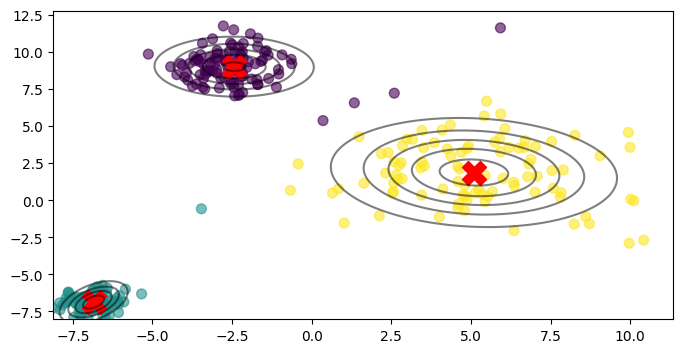

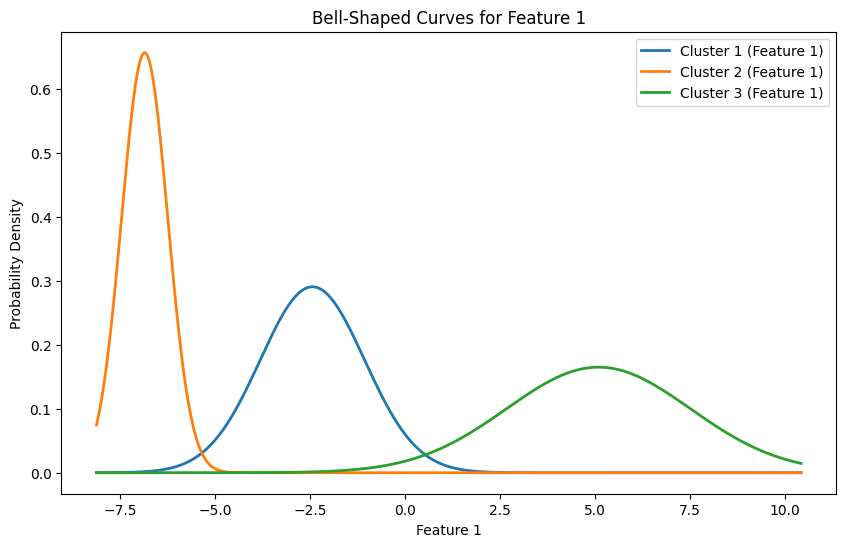

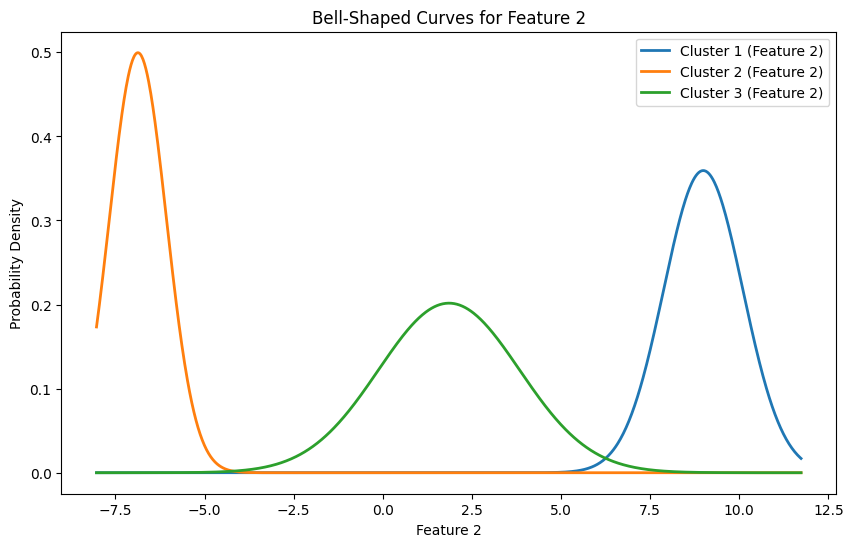

In [ ]:
#Gaussian distribution curve using make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import norm, multivariate_normal

# Generate synthetic data with Gaussian blobs
n_samples = 300
n_features = 2
centers = 3
cluster_std = [1.0, 2.5, 0.5]

X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering
kmeans = KMeans(n_clusters=centers, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered data points
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.6)

# Plot the Gaussian distribution for each cluster
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)
    cov = np.cov(points.T)
    rv = multivariate_normal(mean, cov)
    x, y = np.mgrid[min(X[:,0]):max(X[:,0]):.01, min(X[:,1]):max(X[:,1]):.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, rv.pdf(pos), levels=5, colors='black', alpha=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')

# Marginal distributions (bell-shaped curves)
# Feature 1
plt.figure(figsize=(10, 6))
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)[0]
    std_dev = points.std(axis=0)[0]
    x = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'Cluster {i+1} (Feature 1)', linewidth=2)

plt.title('Bell-Shaped Curves for Feature 1')
plt.xlabel('Feature 1')
plt.ylabel('Probability Density')
plt.legend()

# Feature 2
plt.figure(figsize=(10, 6))
for i in range(centers):
    points = X[y_kmeans == i]
    mean = points.mean(axis=0)[1]
    std_dev = points.std(axis=0)[1]
    x = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'Cluster {i+1} (Feature 2)', linewidth=2)
plt.title('Bell-Shaped Curves for Feature 2')
plt.xlabel('Feature 2')
plt.ylabel('Probability Density')
plt.legend()
# Show the plots
plt.show()


Confusion Matrix:
[[191   6]
 [  7   6]]


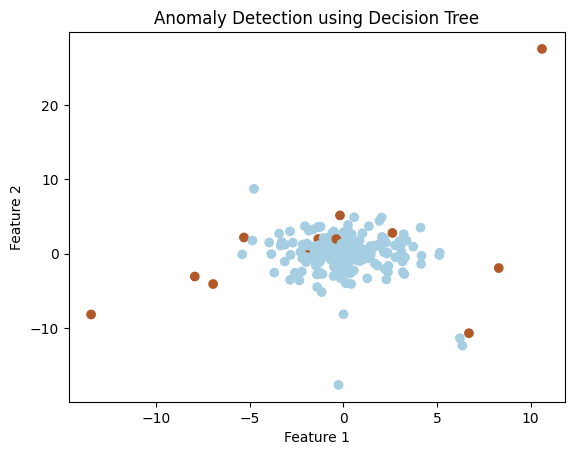

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate synthetic data
np.random.seed(42)
normal_data = np.random.randn(1000, 2) * 2  # Normal data points
anomaly_data = np.random.randn(50, 2) * 10  # Anomaly data points

# Create labels (0 for normal, 1 for anomalies)
labels = np.zeros(normal_data.shape[0])
anomaly_labels = np.ones(anomaly_data.shape[0])
labels = np.concatenate((labels, anomaly_labels))

# Combine normal and anomaly data
data = np.vstack((normal_data, anomaly_data))
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# Fit Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict anomalies
predictions = model.predict(X_test)
# Evaluate model performance
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)
# Plot the data and decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=plt.cm.Paired)
plt.title("Anomaly Detection using Decision Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


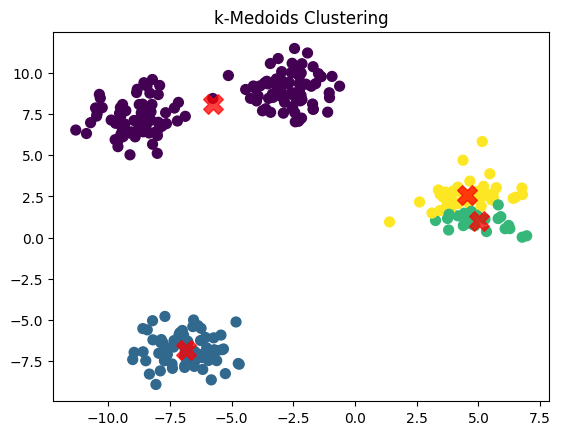

In [ ]:
#without using inbuilt library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import random

def k_medoids(X, k, max_iter=100):
    # Step 1: Initialize medoids randomly
    m = X.shape[0]
    medoids = np.array(random.sample(list(X), k))

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        labels = pairwise_distances_argmin(X, medoids)

        # Step 3: Calculate new medoids
        new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # If medoids didn't change, then we've converged
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Generating synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying k-Medoids algorithm
k = 4
medoids, labels = k_medoids(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering')
plt.show()


In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


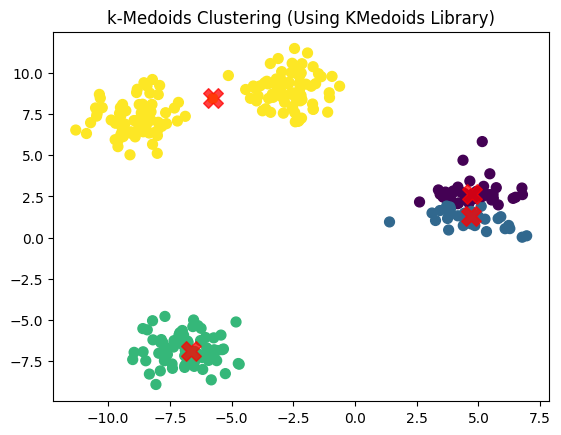

In [ ]:
#using KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply k-Medoids algorithm
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X)

# Get the medoids and labels
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering (Using KMedoids Library)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

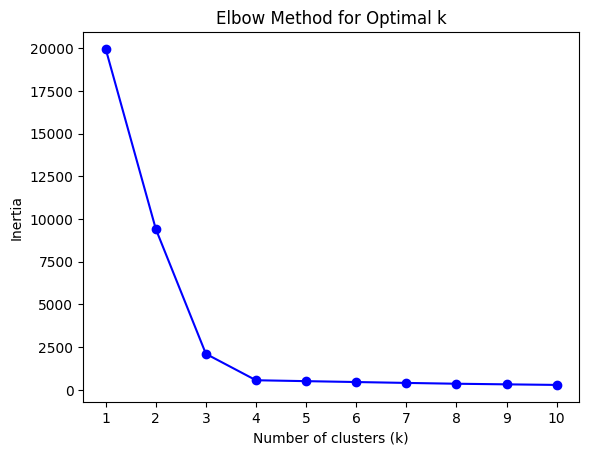

In [ ]:
#to get optimal number of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Calculate the sum of squared distances (inertia) for different numbers of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to identify the 'elbow'
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()


     chapter 2

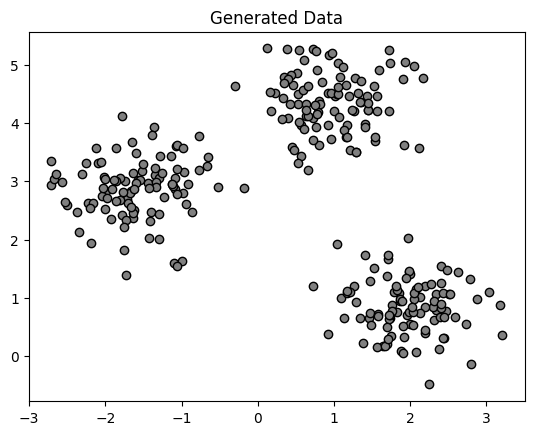

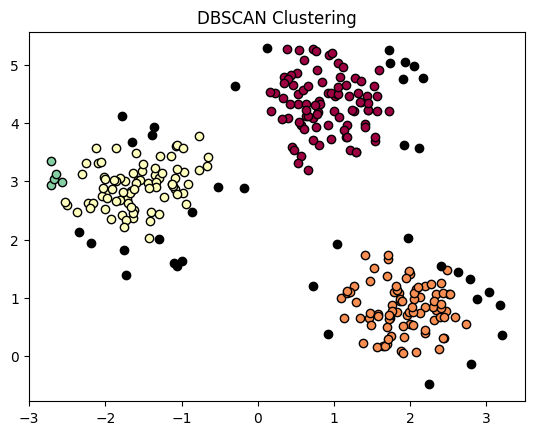

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate sample data
# Creating a dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolors='k')
plt.title('Generated Data')
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Mark noise points as black
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:  # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.show()


<ipython-input-10-293bac87d27a>:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


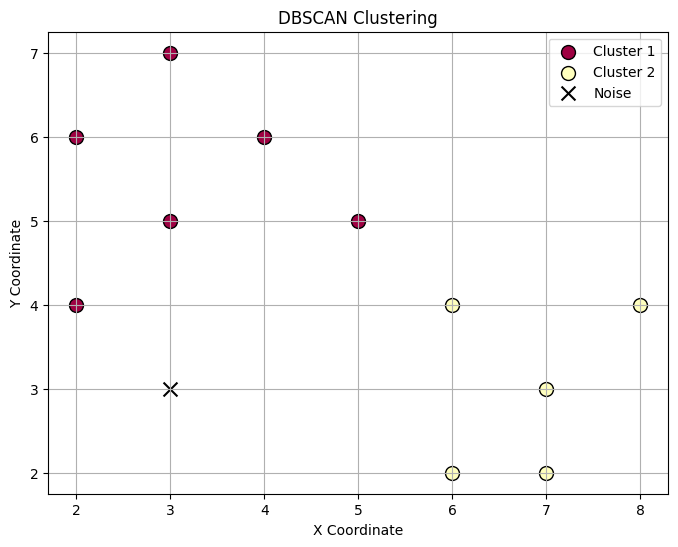

In [ ]:
#Numerical example solution
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Data points
data = np.array([
    [3, 7], [4, 6], [5, 5], [6, 4], [7, 3],
    [6, 2], [7, 2], [8, 4], [3, 3], [2, 6],
    [3, 5], [2, 4]
])

dbscan = DBSCAN(eps=1.9, min_samples=4)
labels = dbscan.fit_predict(data)

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Unique labels represent different clusters; -1 represents noise
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = 'k'
        marker = 'x'
        label_name = 'Noise'
    else:
        marker = 'o'
        label_name = f'Cluster {label + 1}'

    # Plot points corresponding to each cluster
    plt.scatter(
        data[labels == label, 0],
        data[labels == label, 1],
        c=[color],
        marker=marker,
        edgecolors='k',
        s=100,
        label=label_name
    )

plt.title('DBSCAN Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-11-ea2082c29eab>:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


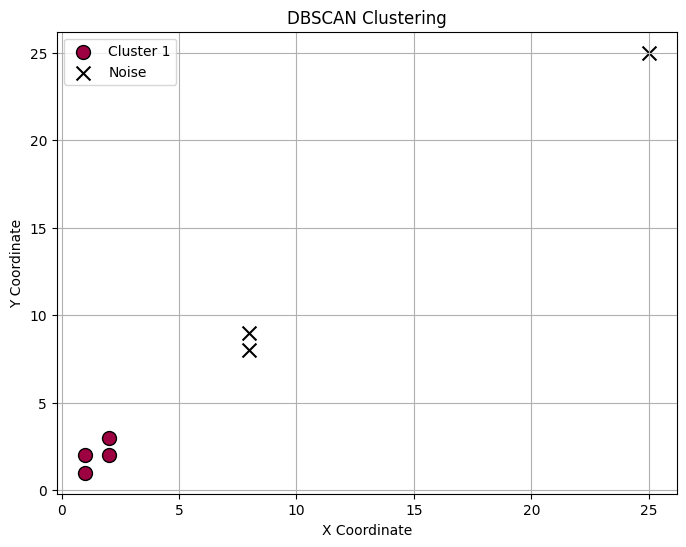

In [ ]:
#Numerical example solution
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Data points
data = np.array([
    [1, 1], [1, 2], [2, 2], [2, 3], [8, 3],
    [6, 2], [7, 2], [8, 4], [3, 3], [2, 6],
    [3, 5], [2, 4]
])

dbscan = DBSCAN(eps=1.9, min_samples=4)
labels = dbscan.fit_predict(data)

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Unique labels represent different clusters; -1 represents noise
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = 'k'
        marker = 'x'
        label_name = 'Noise'
    else:
        marker = 'o'
        label_name = f'Cluster {label + 1}'

    # Plot points corresponding to each cluster
    plt.scatter(
        data[labels == label, 0],
        data[labels == label, 1],
        c=[color],
        marker=marker,
        edgecolors='k',
        s=100,
        label=label_name
    )

plt.title('DBSCAN Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()


Silhouette Score: 0.7915830011443039


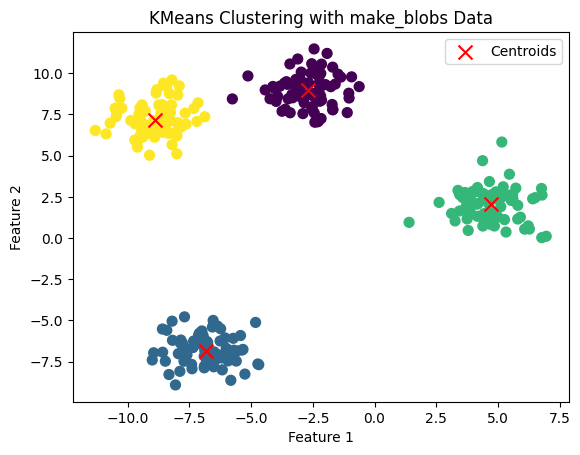

In [1]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Compute silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x',
            s=100, label='Centroids')
plt.title('KMeans Clustering with make_blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Number of Clusters: 2, Silhouette Score: 0.590
Number of Clusters: 3, Silhouette Score: 0.757
Number of Clusters: 4, Silhouette Score: 0.792
Number of Clusters: 5, Silhouette Score: 0.664
Number of Clusters: 6, Silhouette Score: 0.533
Number of Clusters: 7, Silhouette Score: 0.426
Number of Clusters: 8, Silhouette Score: 0.335
Number of Clusters: 9, Silhouette Score: 0.345
Number of Clusters: 10, Silhouette Score: 0.362


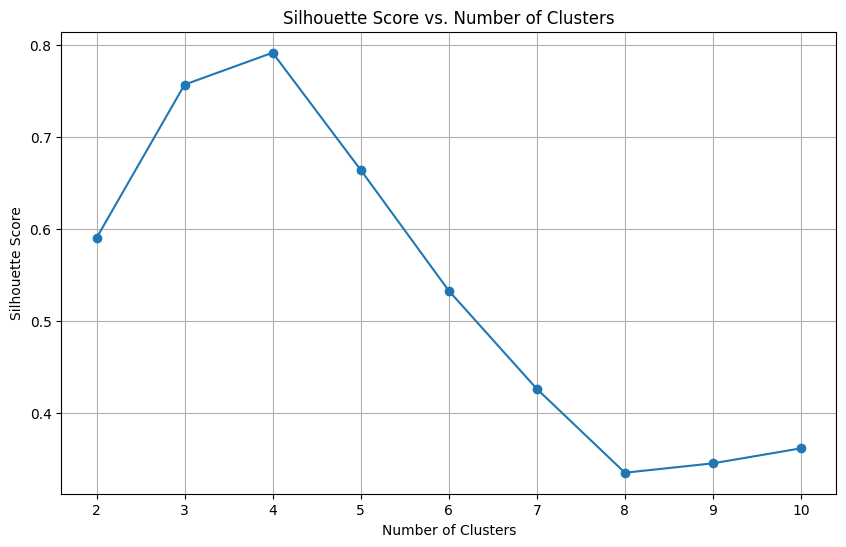

In [2]:
# Silhouette score for a range of cluster numbers
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Compute silhouette scores for a range of cluster numbers
range_n_clusters = list(range(2, 11))  # Testing from 2 to 10 clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score:.3f}")
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()
